In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import cv2
import pandas as pd
from tqdm import tqdm
import datetime as dt
import statistics as stat

In [2]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5493322510962886827
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13335459628229011382
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
with open('Models/model1.json', 'r') as j_file:
    loaded_model_json = j_file.read()
model1 = tf.keras.models.model_from_json(loaded_model_json)
model1.load_weights("Models/model1.h5")

In [4]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
gaussian_noise_9 (GaussianNo (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
gaussian_noise_10 (GaussianN (None, 26, 26, 64)       

In [5]:
def loadPreprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]

def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

trainX, trainY, testX, testY = loadPreprocess()
extractor  = tf.keras.Model(inputs = model1.input,
                         outputs = model1.get_layer(model1.layers[-3].name).output
                        )
model1.compile(optimizer = tf.keras.optimizers.Adam(), 
               loss = "categorical_crossentropy",  metrics= ['accuracy']
              )
### Predictions
#p = model1.predict(trainX,  verbose = 1)

In [6]:
#f = extractor.predict(np.expand_dims(trainX[:500], axis = 0))


In [7]:
trainX.shape

(50000, 32, 32, 3)

In [8]:
f = extractor.predict(trainX, verbose =1)

50000/50000 [==============================] - 30s 598us/sample


In [9]:
from sklearn.cluster import KMeans

In [10]:
k = KMeans(n_clusters = 10, n_init = 20)

In [12]:
k.fit(f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
import matplotlib

In [14]:
%matplotlib inline
def plot_class_predictions(preds,idx):
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
               'truck']
    print("Class #{}".format(idx))
    c, f = np.unique(preds, return_counts = True)
    fig = plt.figure( figsize = (30,20))
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 40}
    matplotlib.rc('font', **font)
    ax = fig.add_axes([0,0,1,1 ])
    ax.set_title("{} Predictions".format(classes[idx]))
    ax.set_xlabel("Clases")
    ax.set_ylabel("Frequecy Of Predictions")
    ax.set_xticks(c)
    ax.bar(c,f)

Class #0


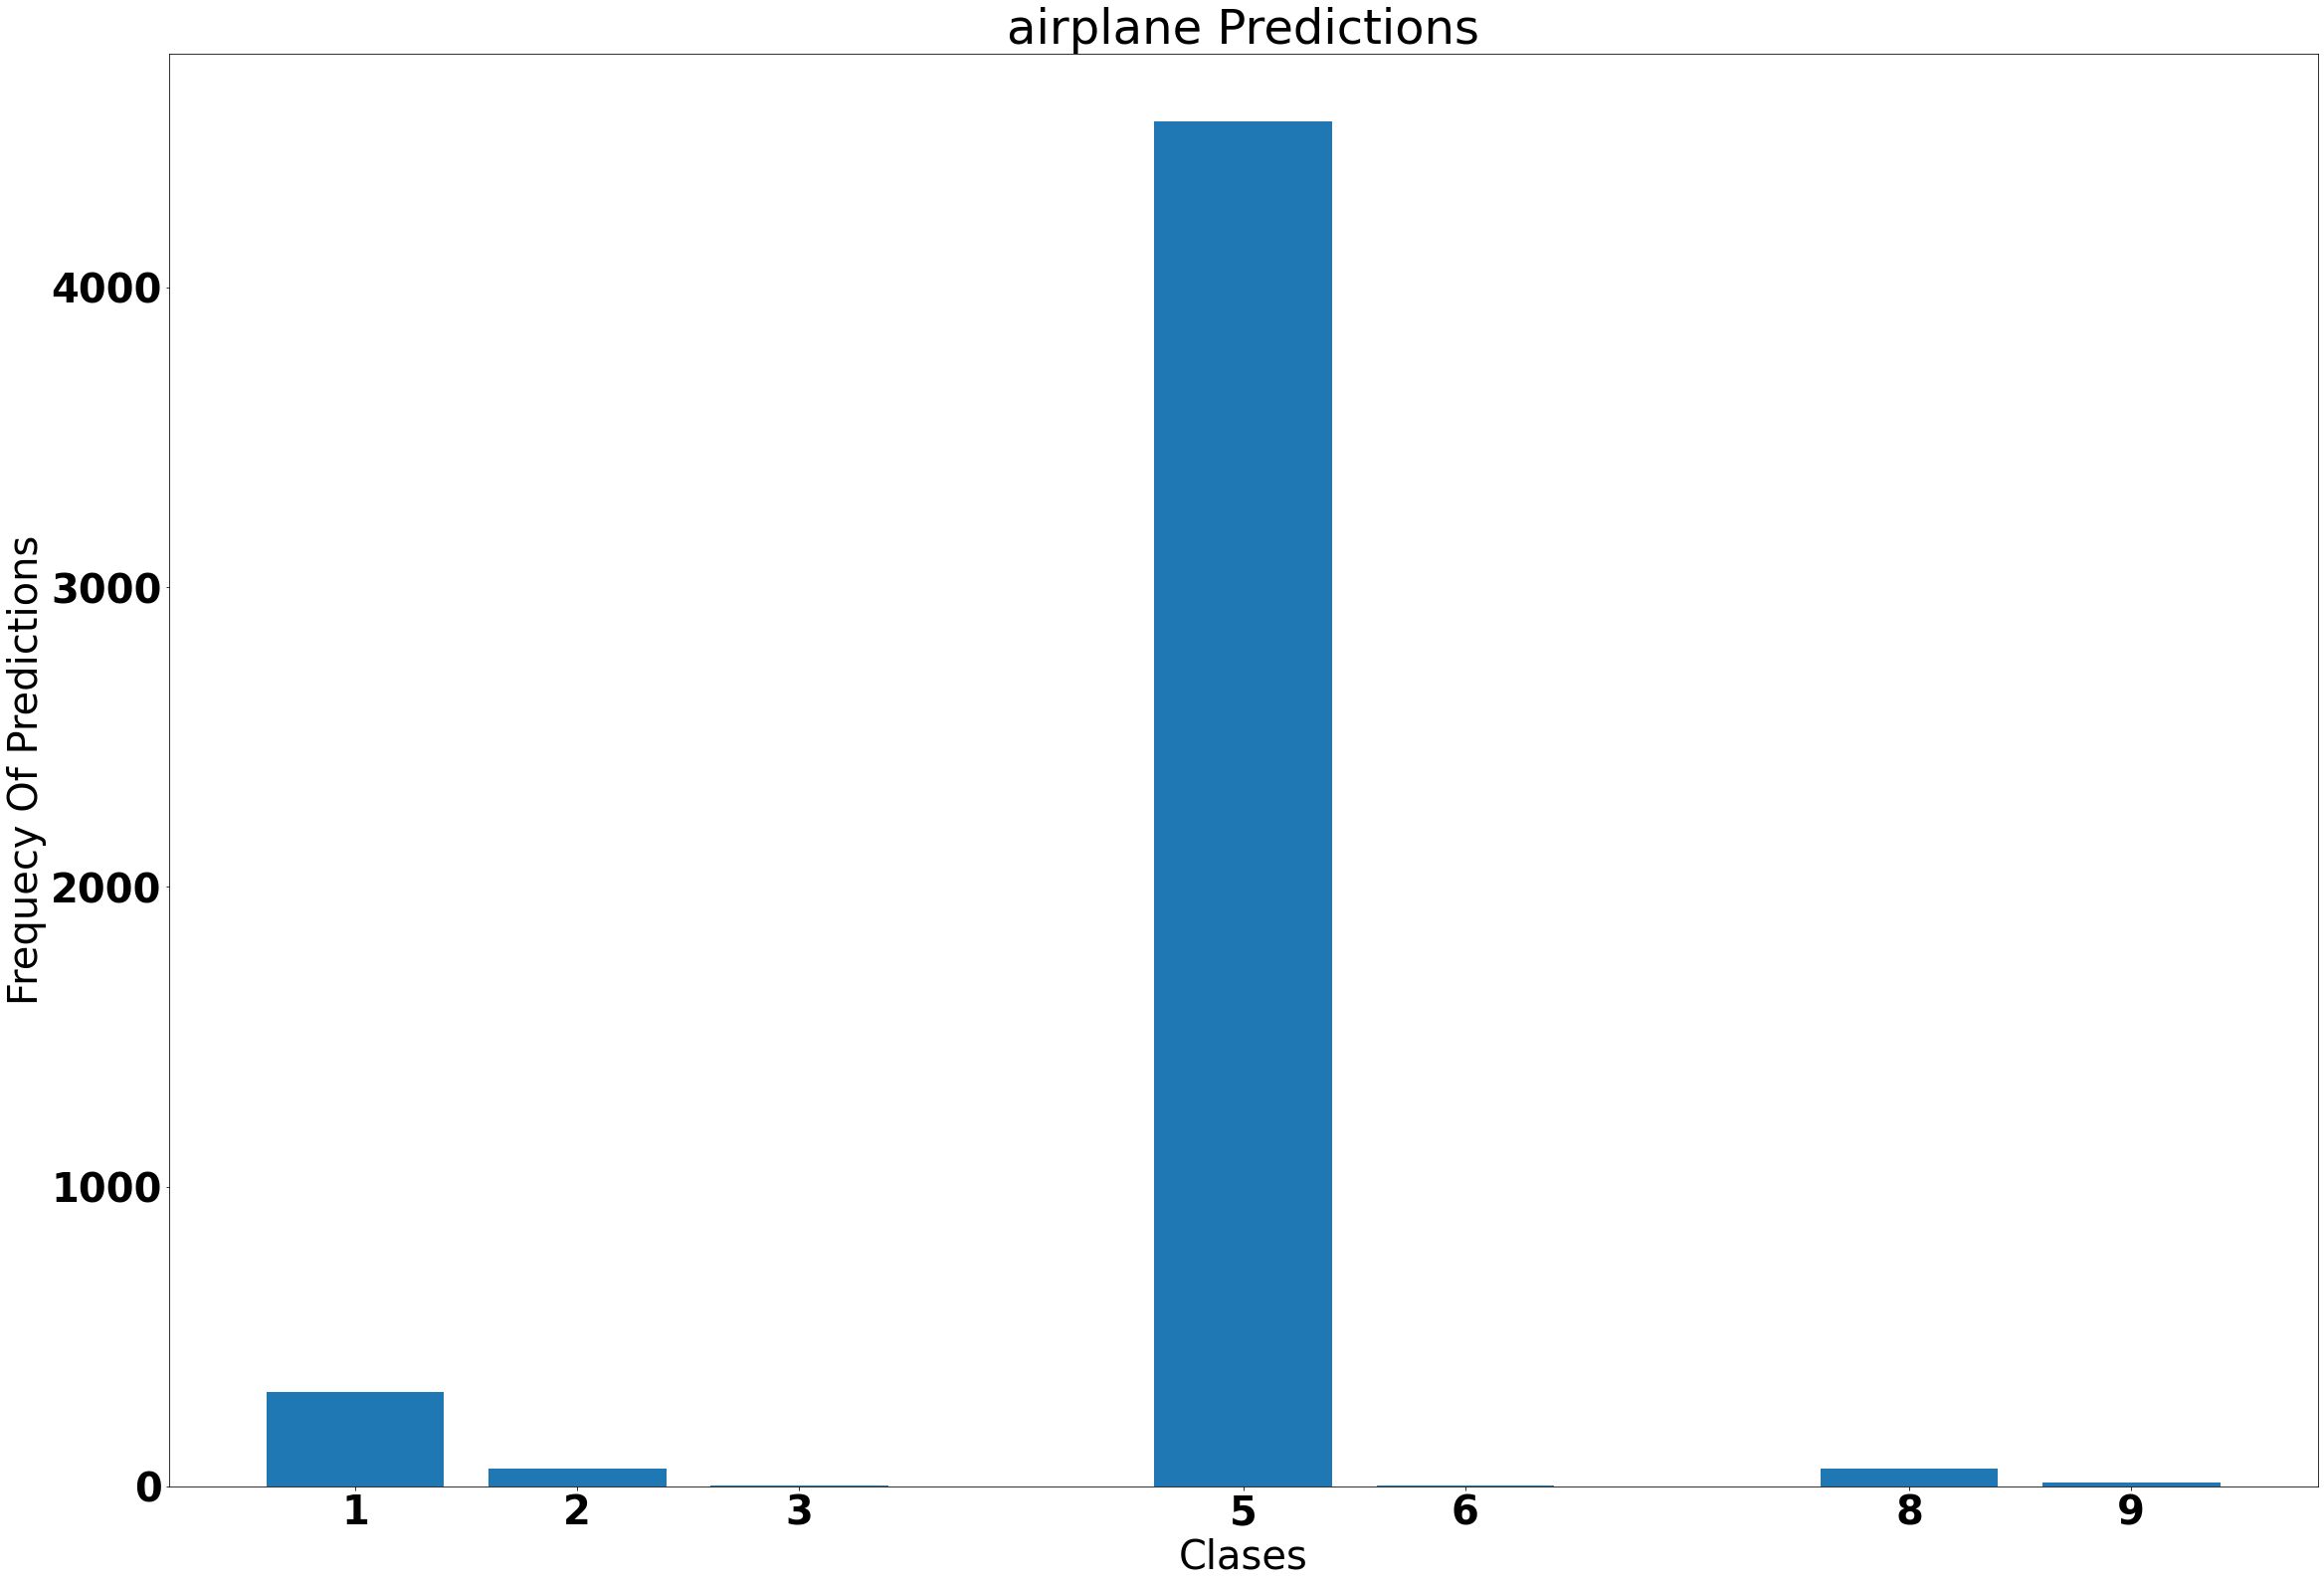

In [15]:
idx = 0
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #1


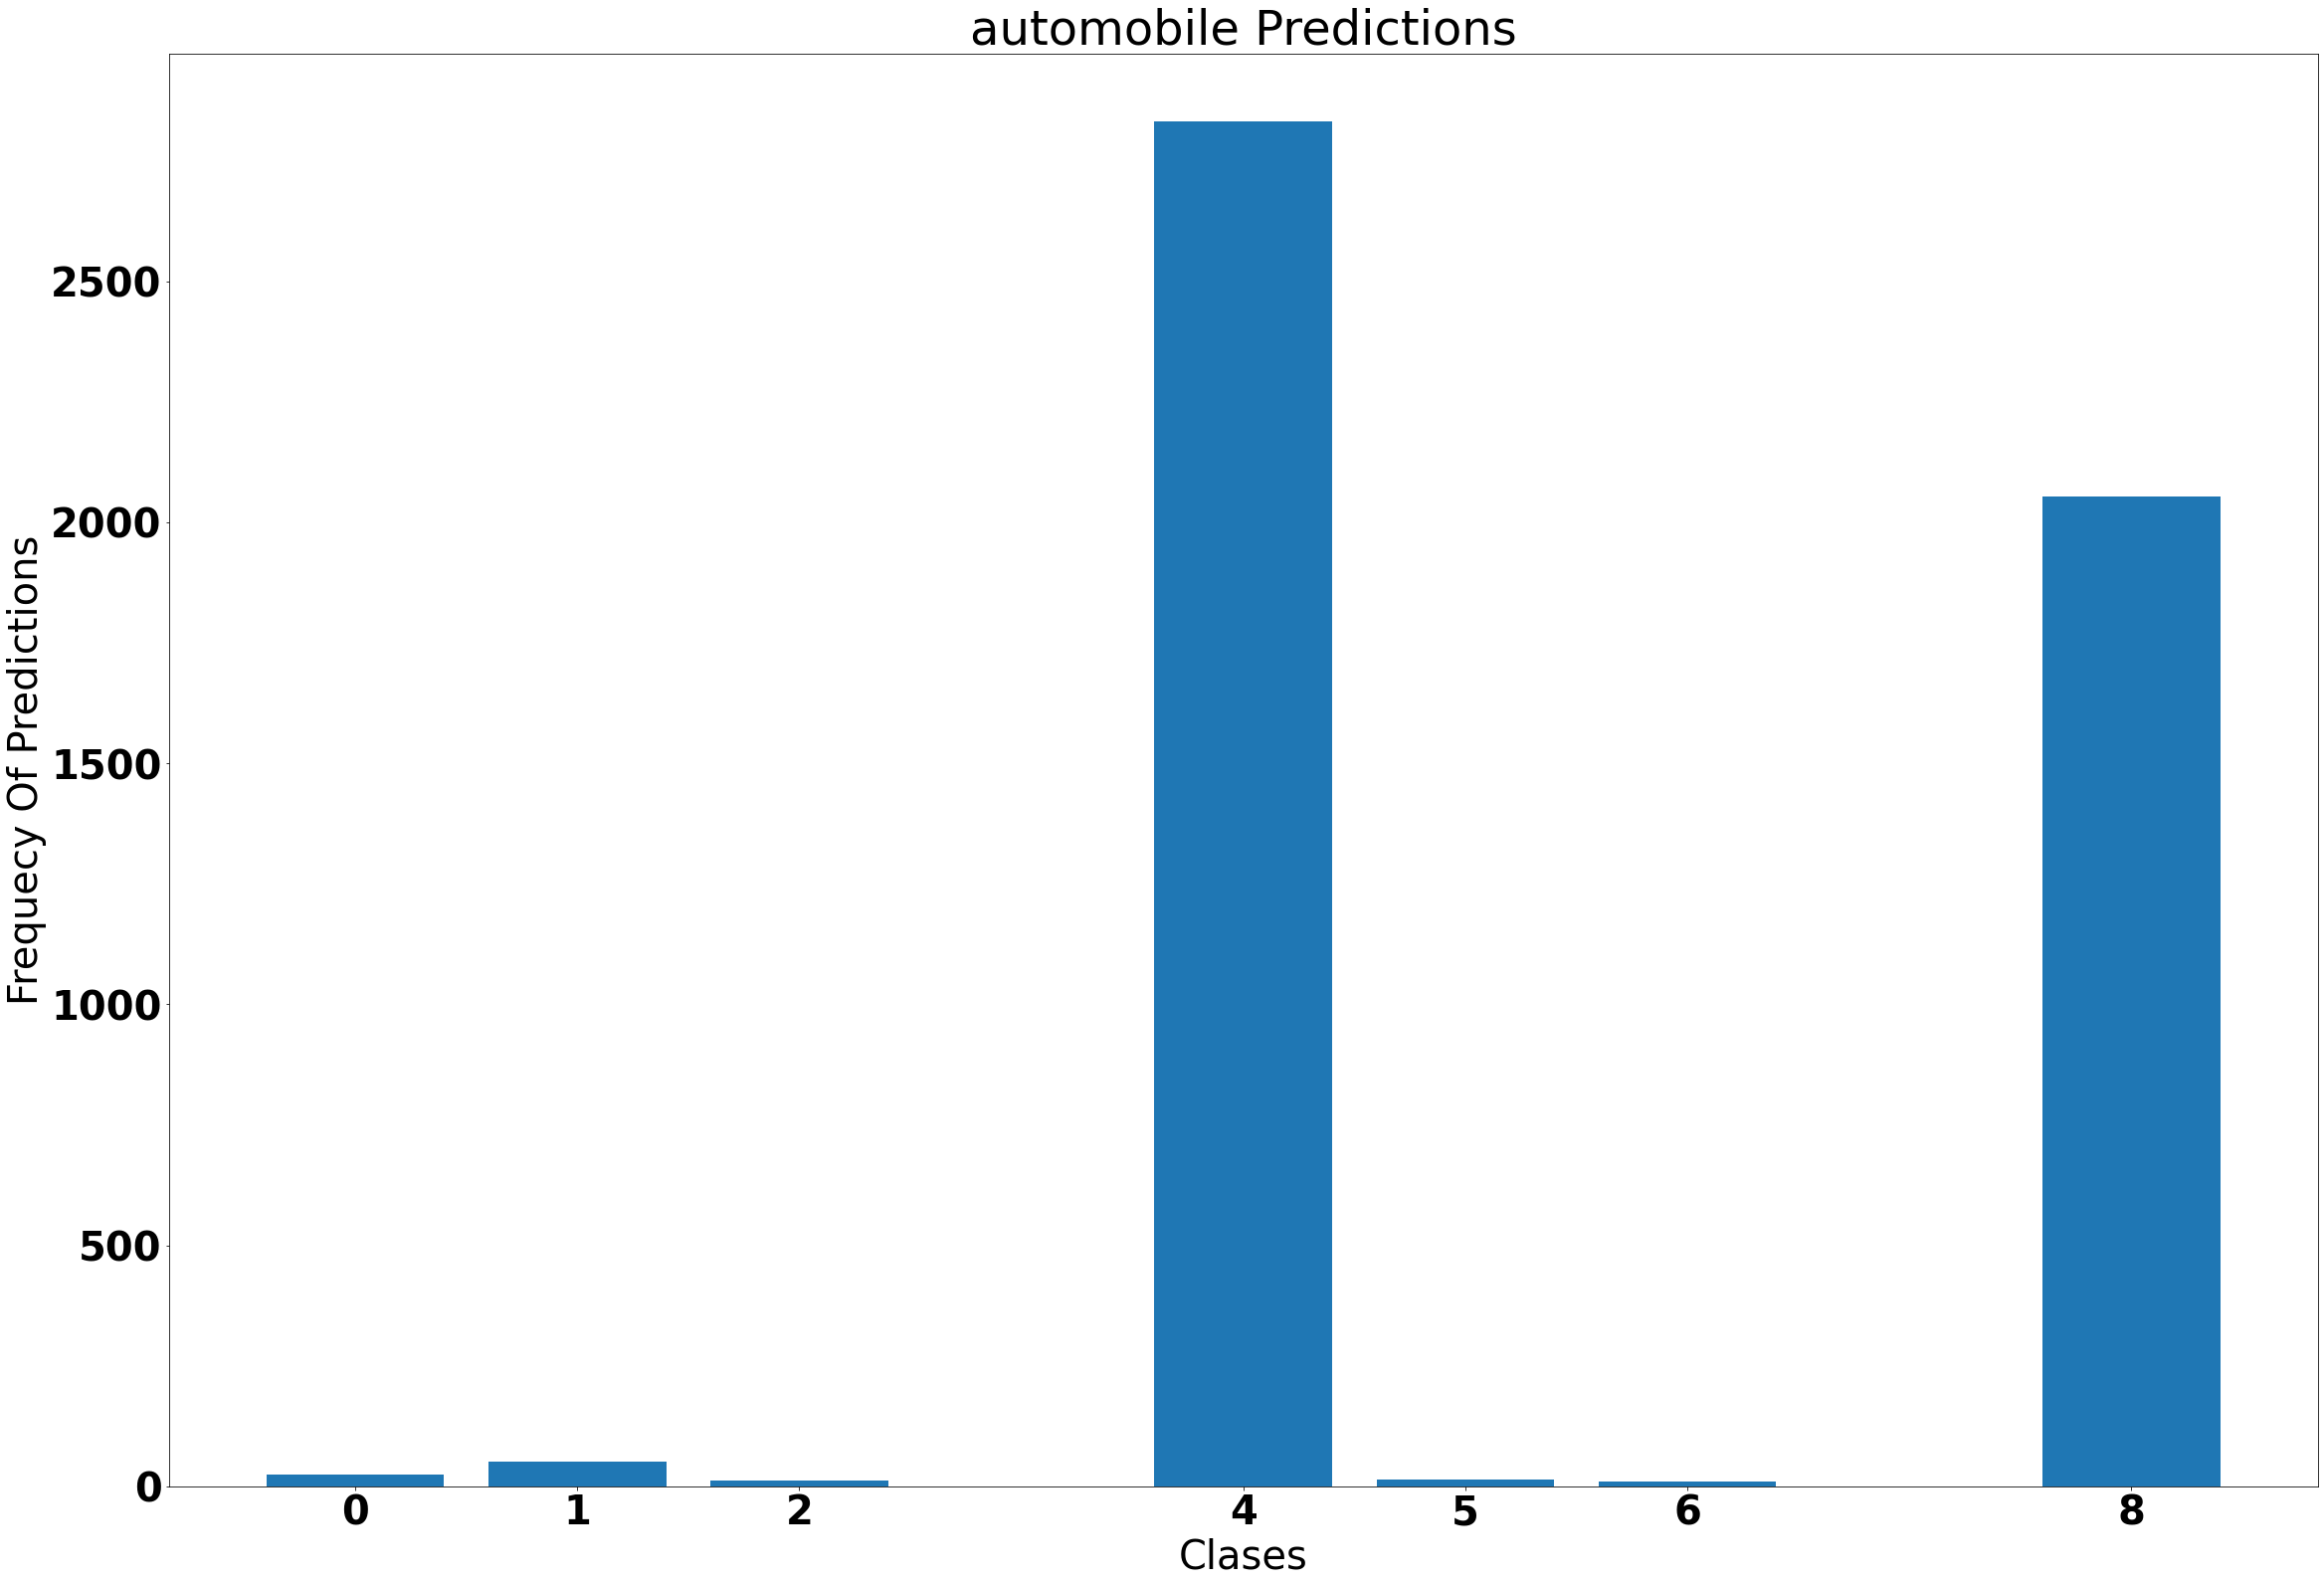

In [16]:
idx = 1
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #2


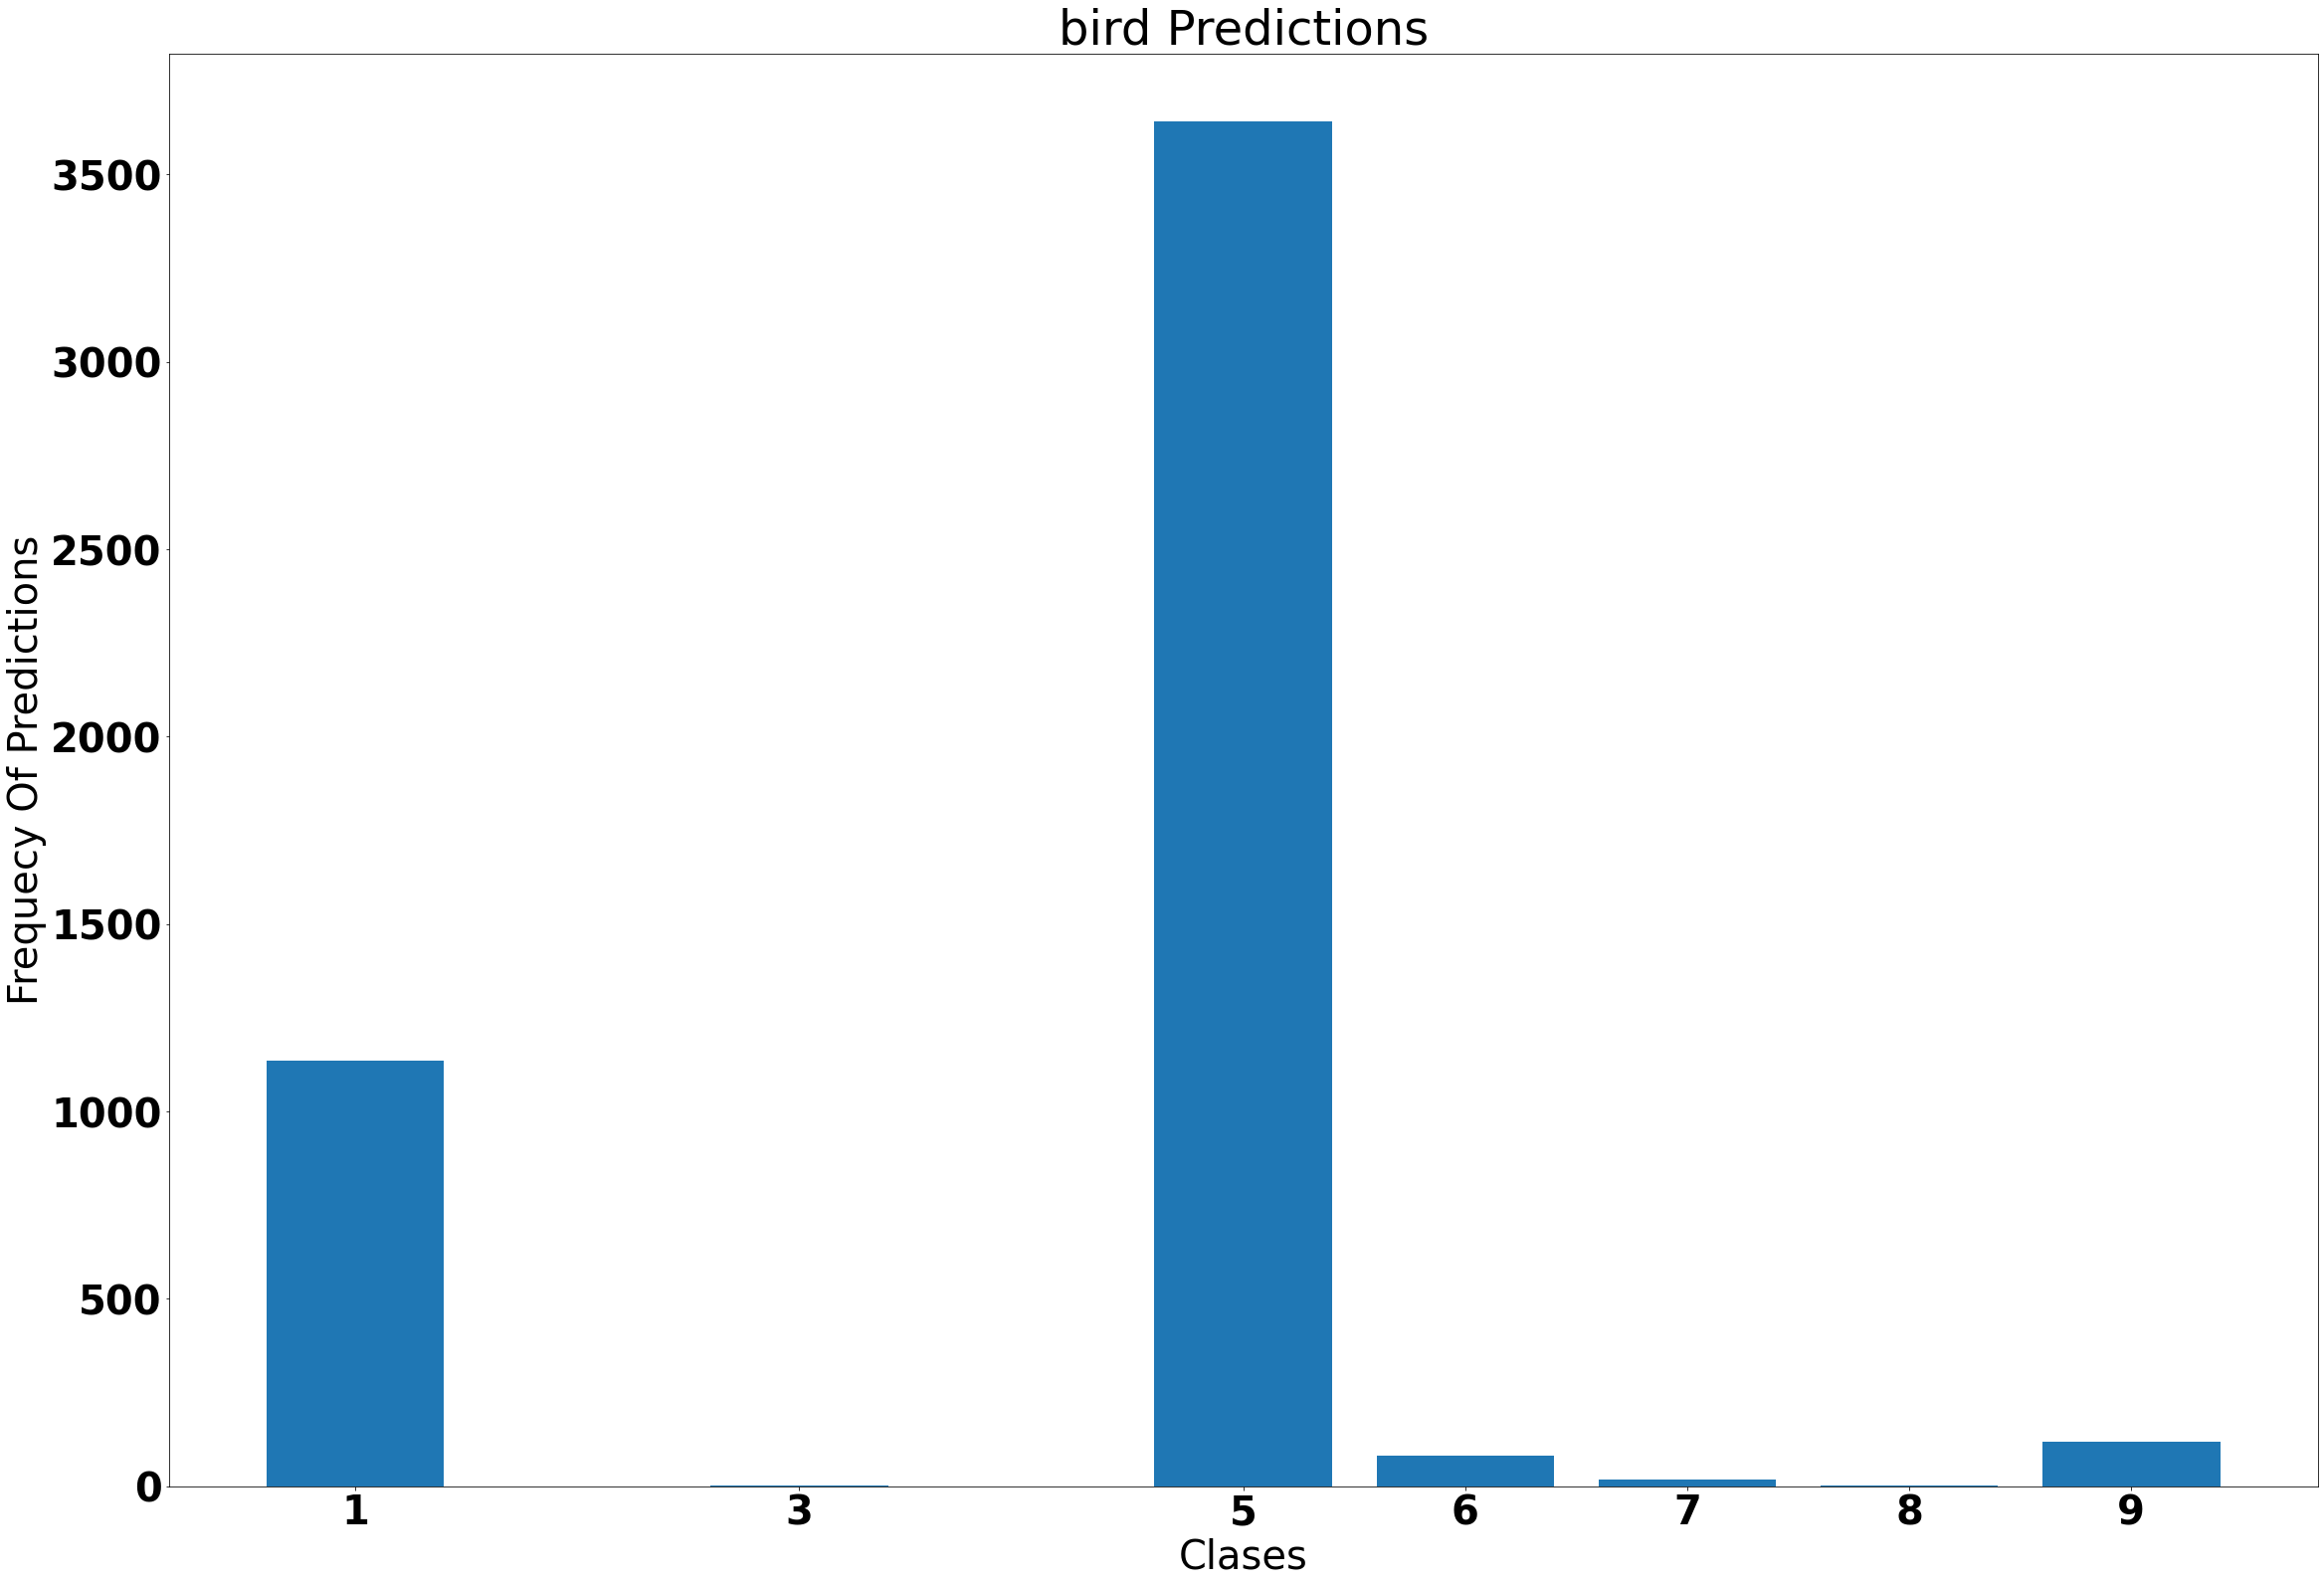

In [17]:
idx = 2
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #3


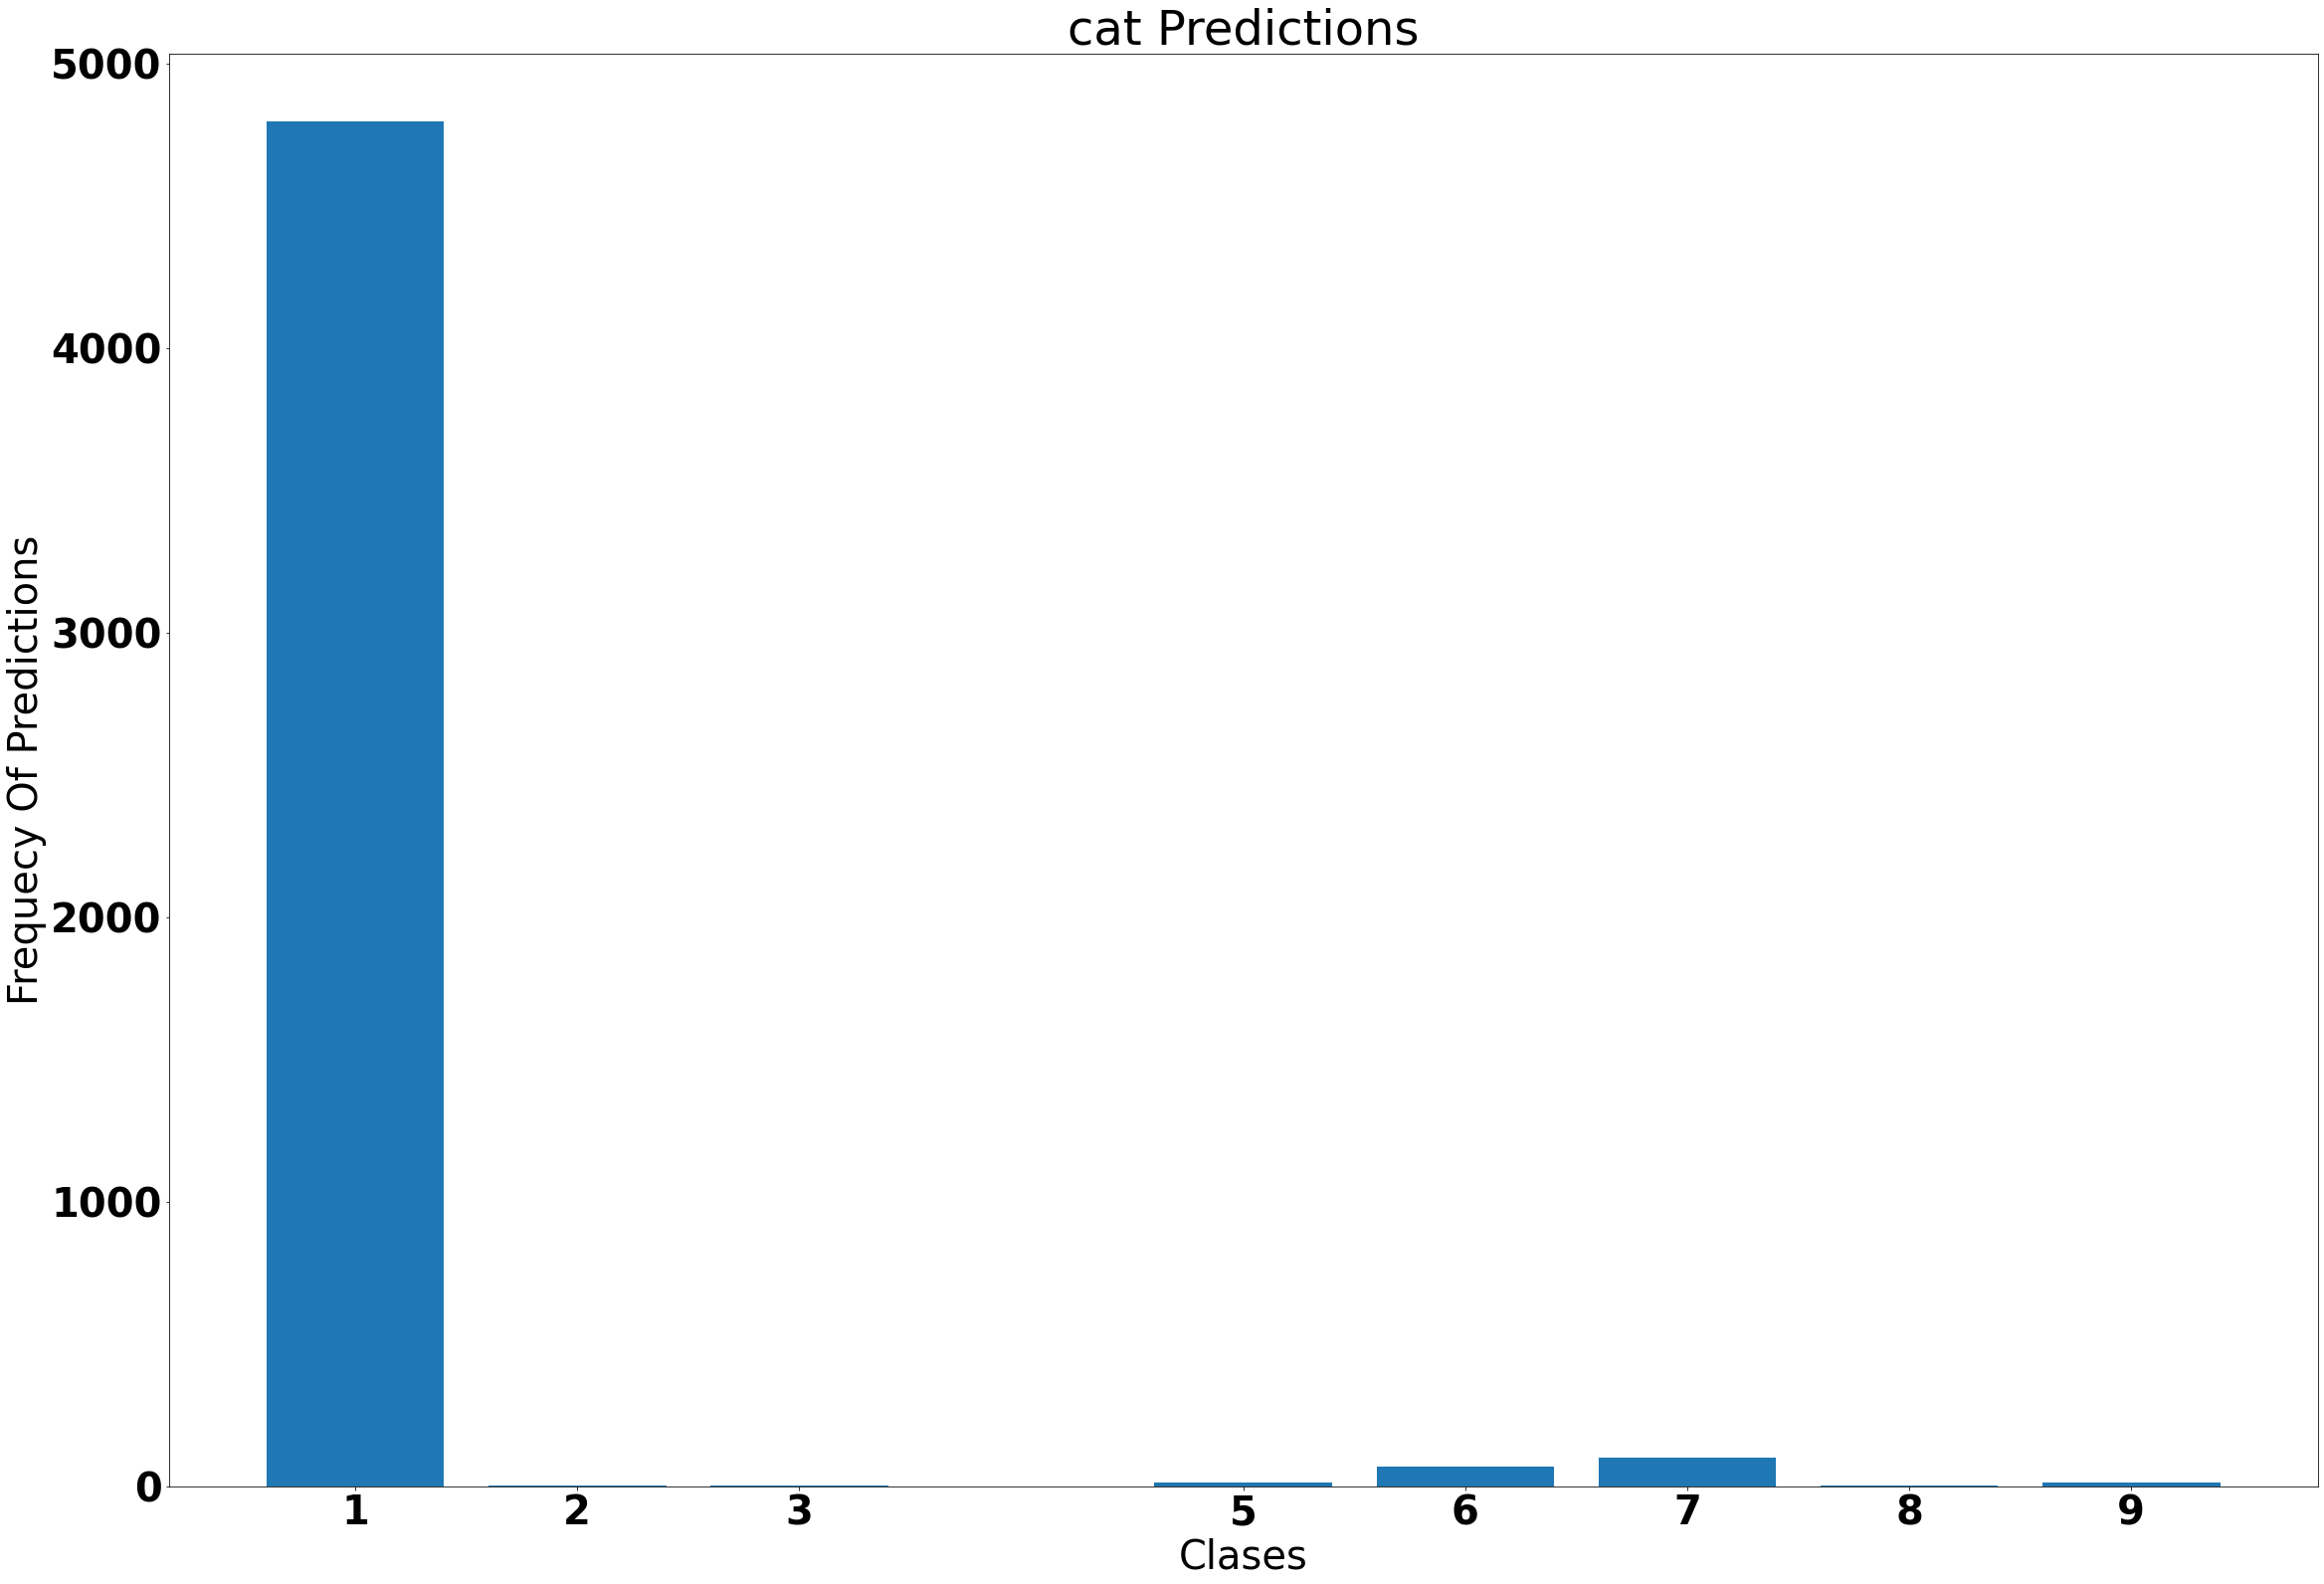

In [18]:
idx = 3
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #4


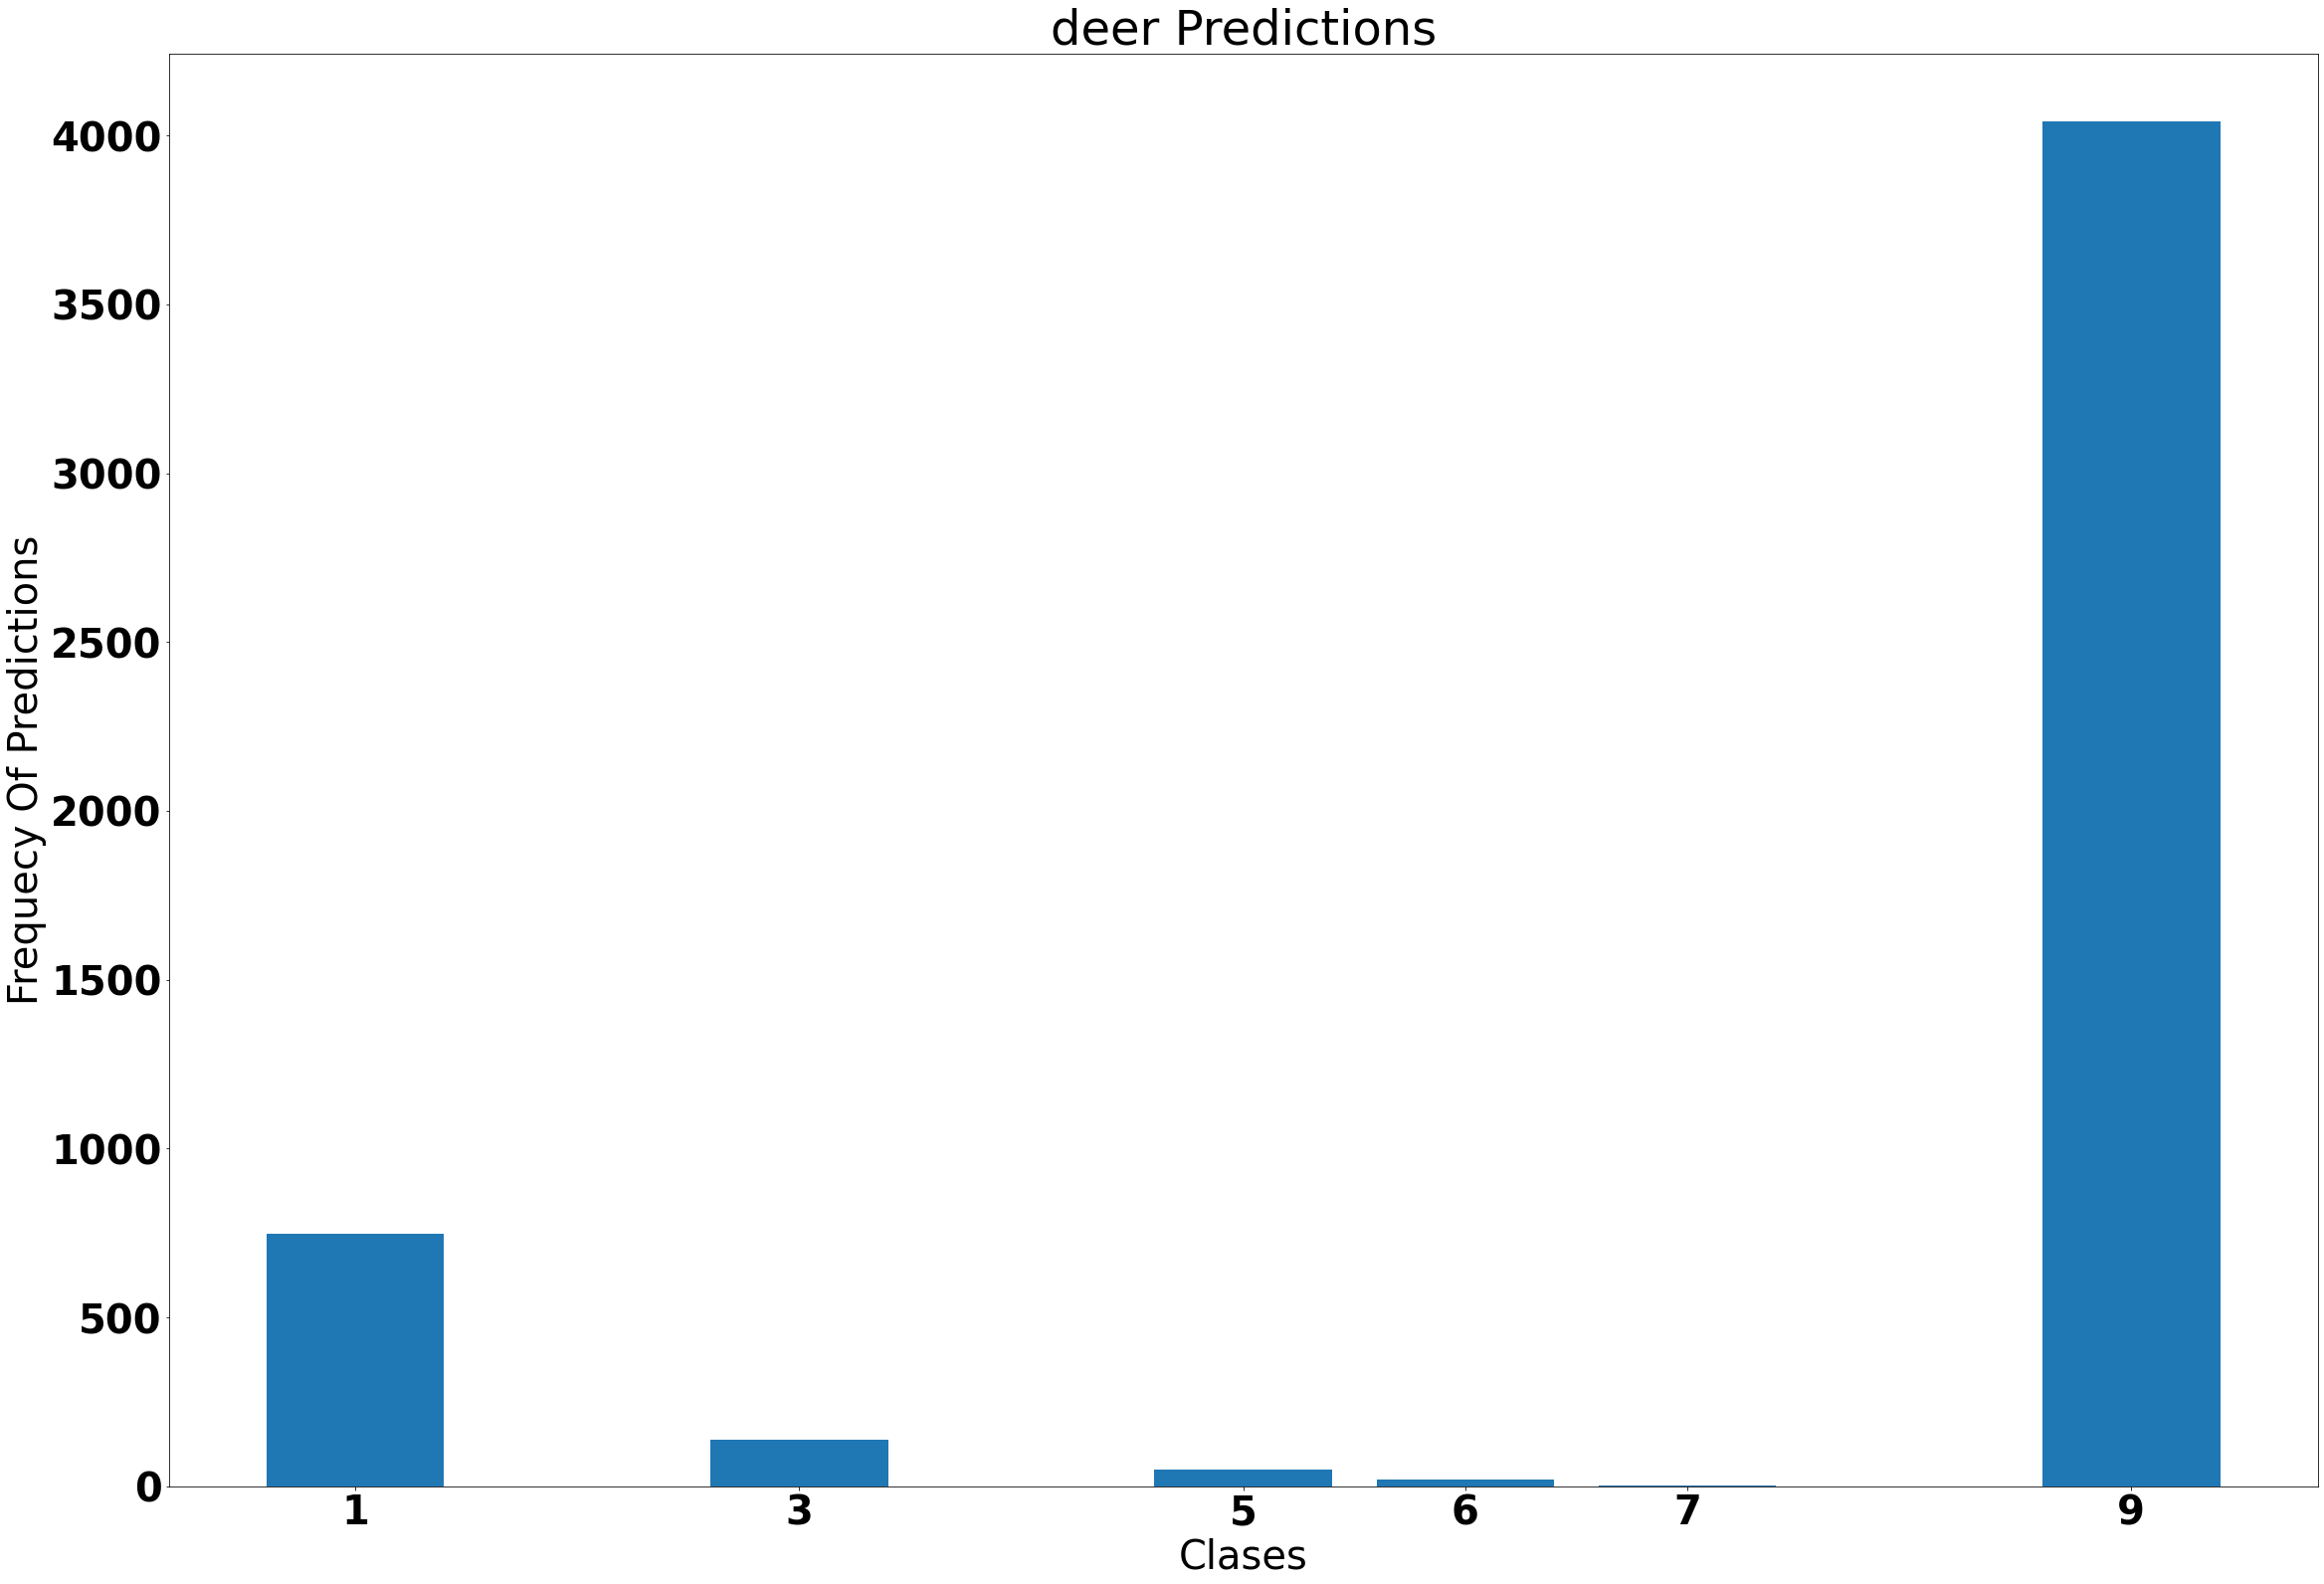

In [19]:
idx = 4
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #5


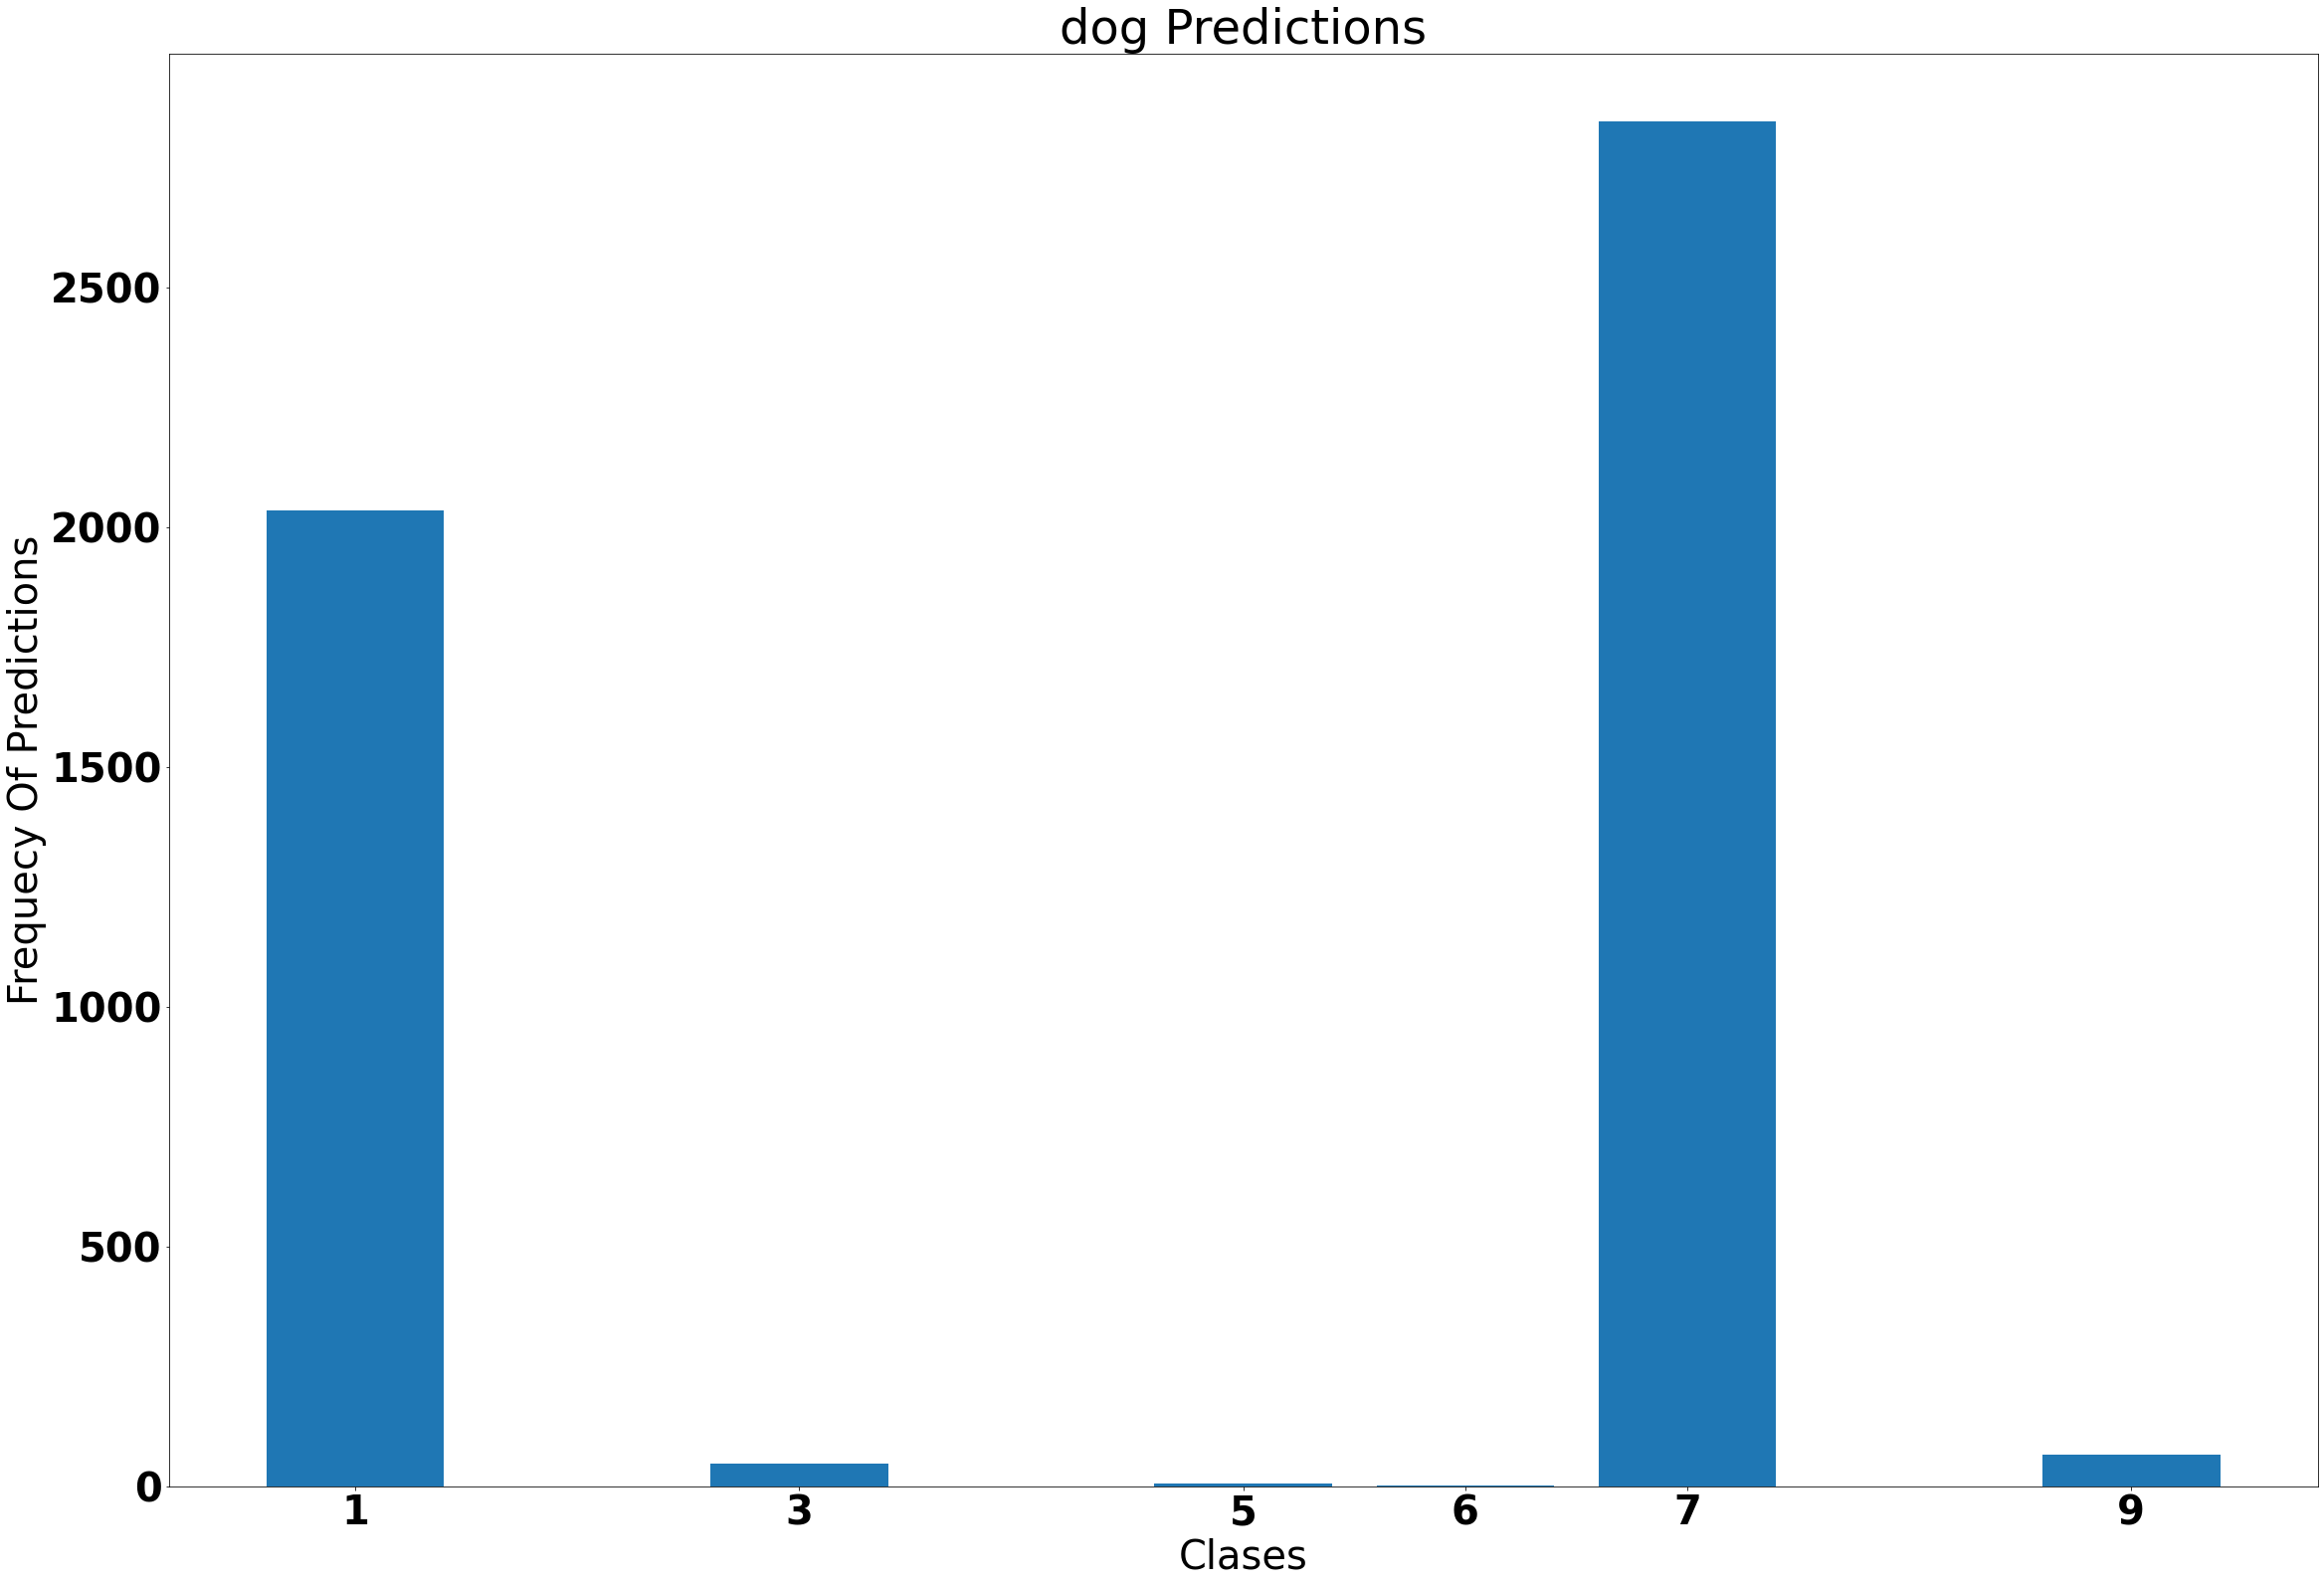

In [20]:
idx = 5
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #6


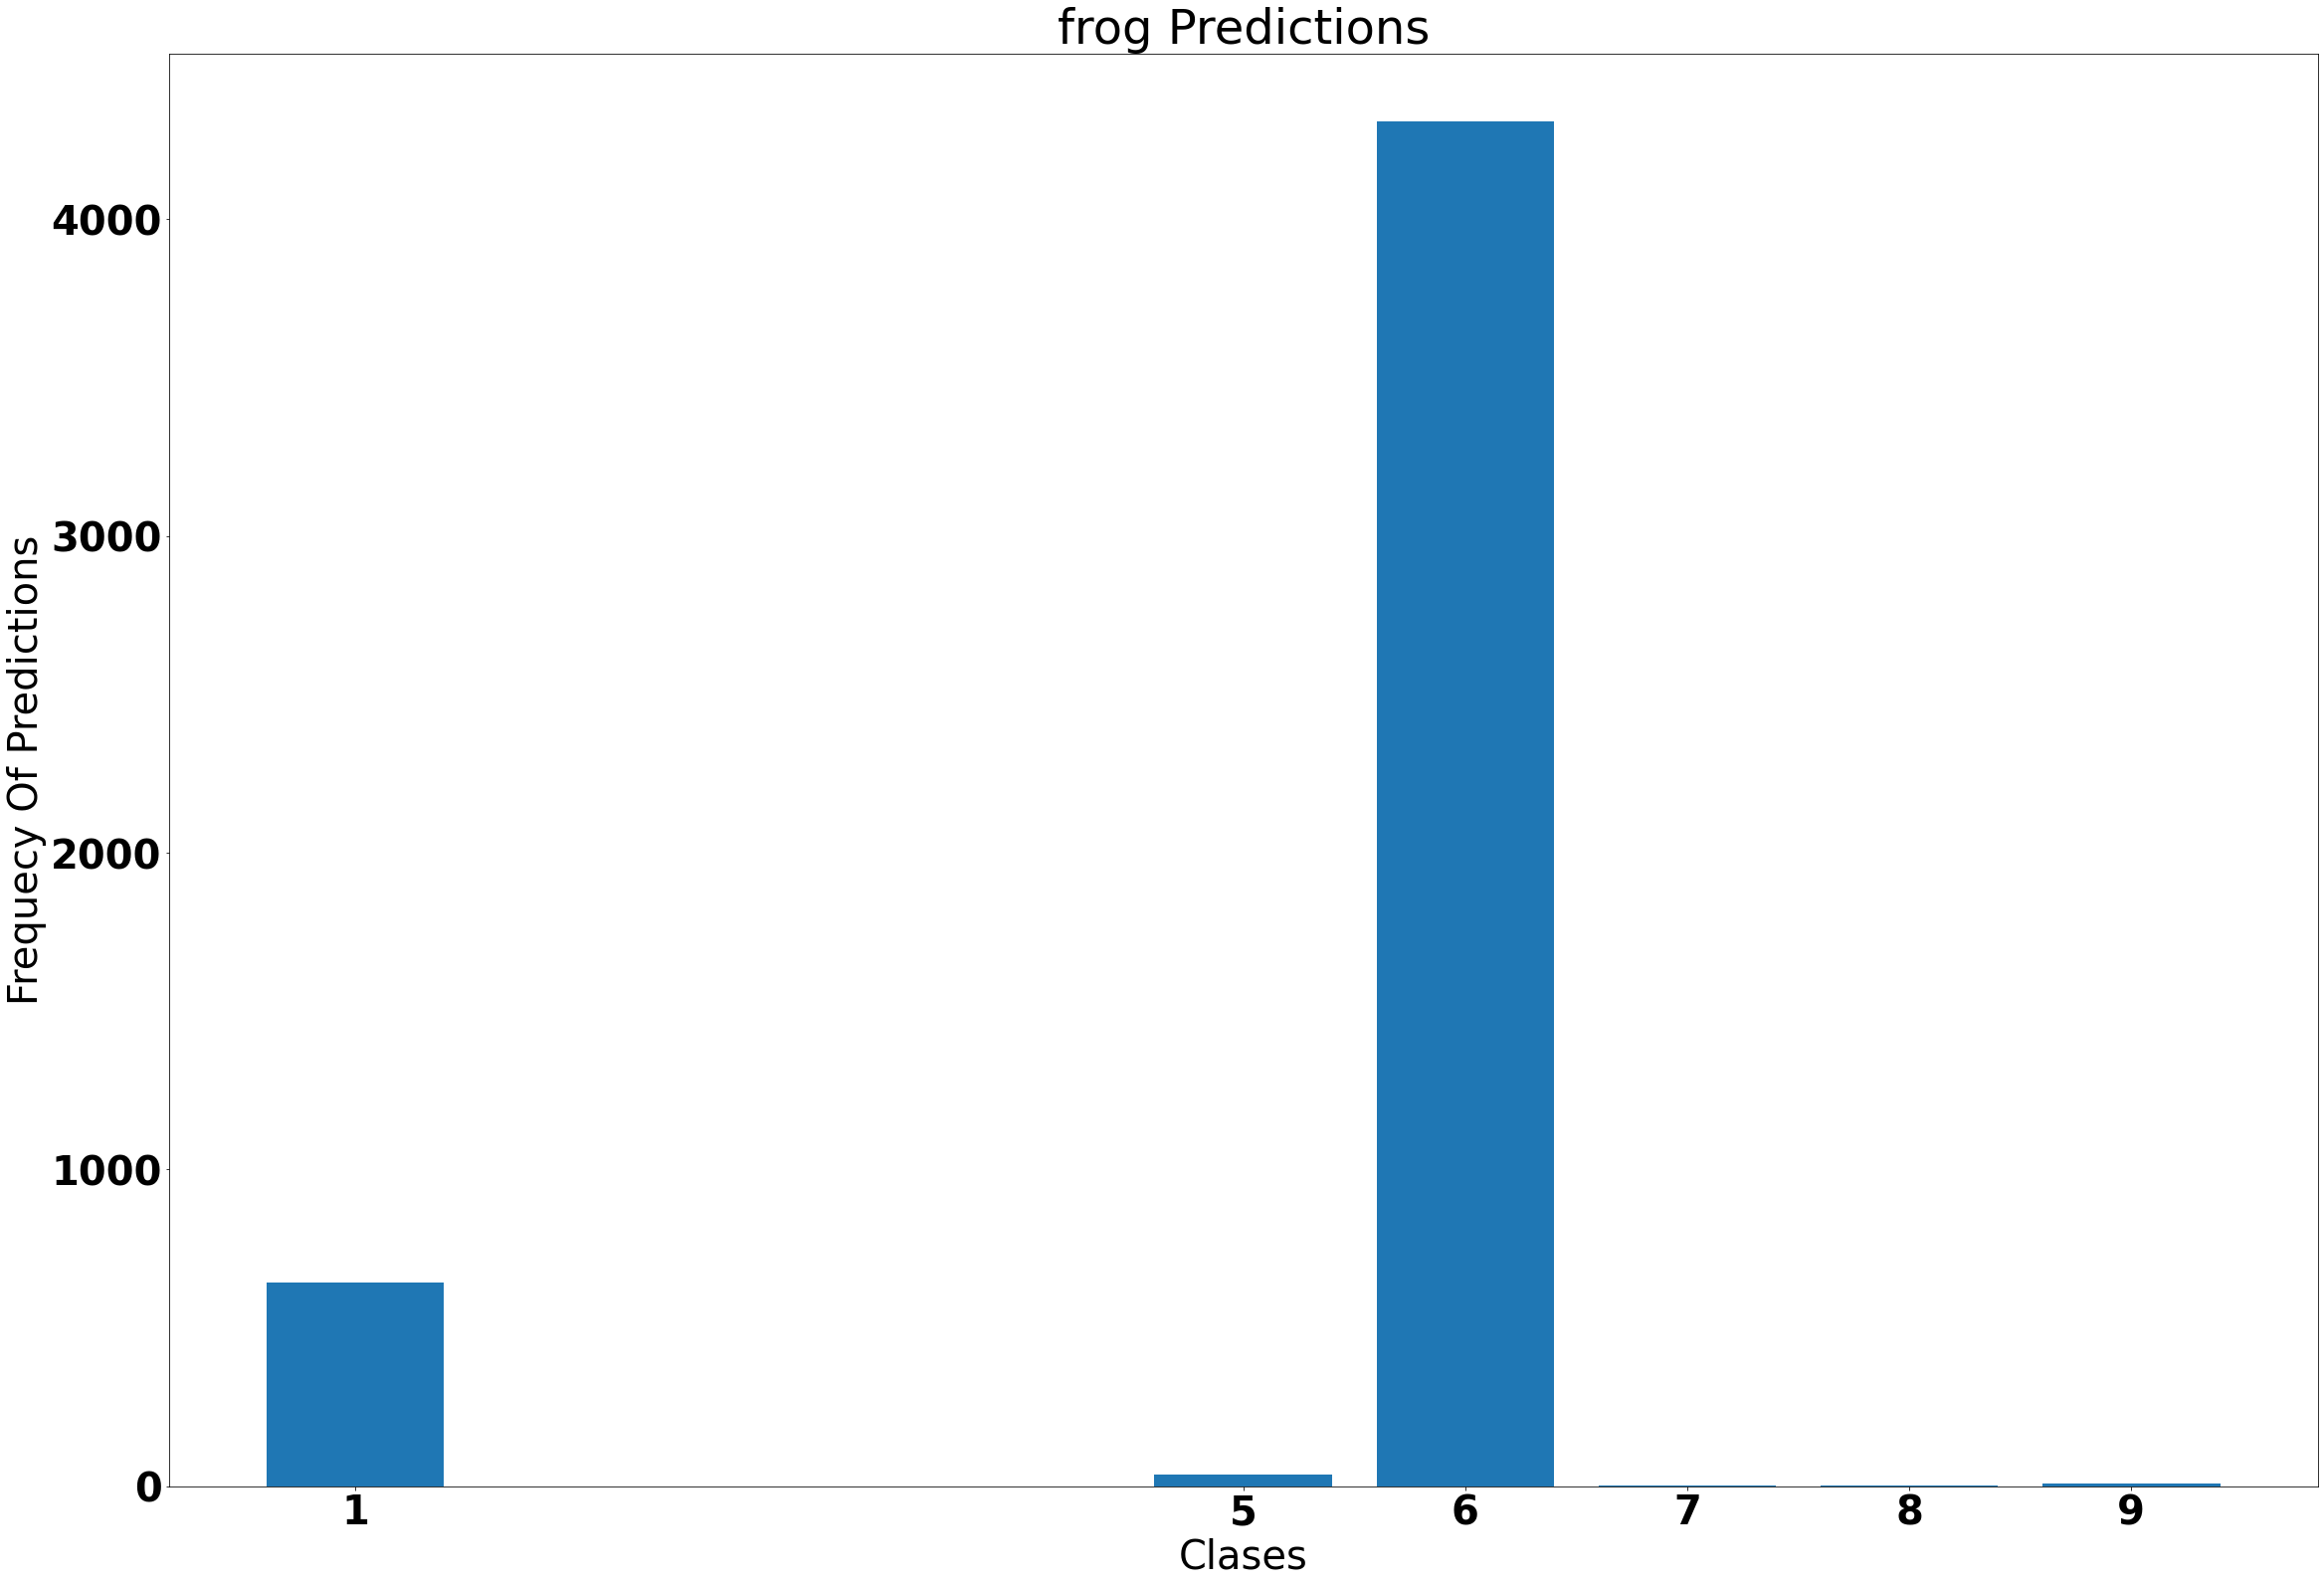

In [21]:
idx = 6
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #7


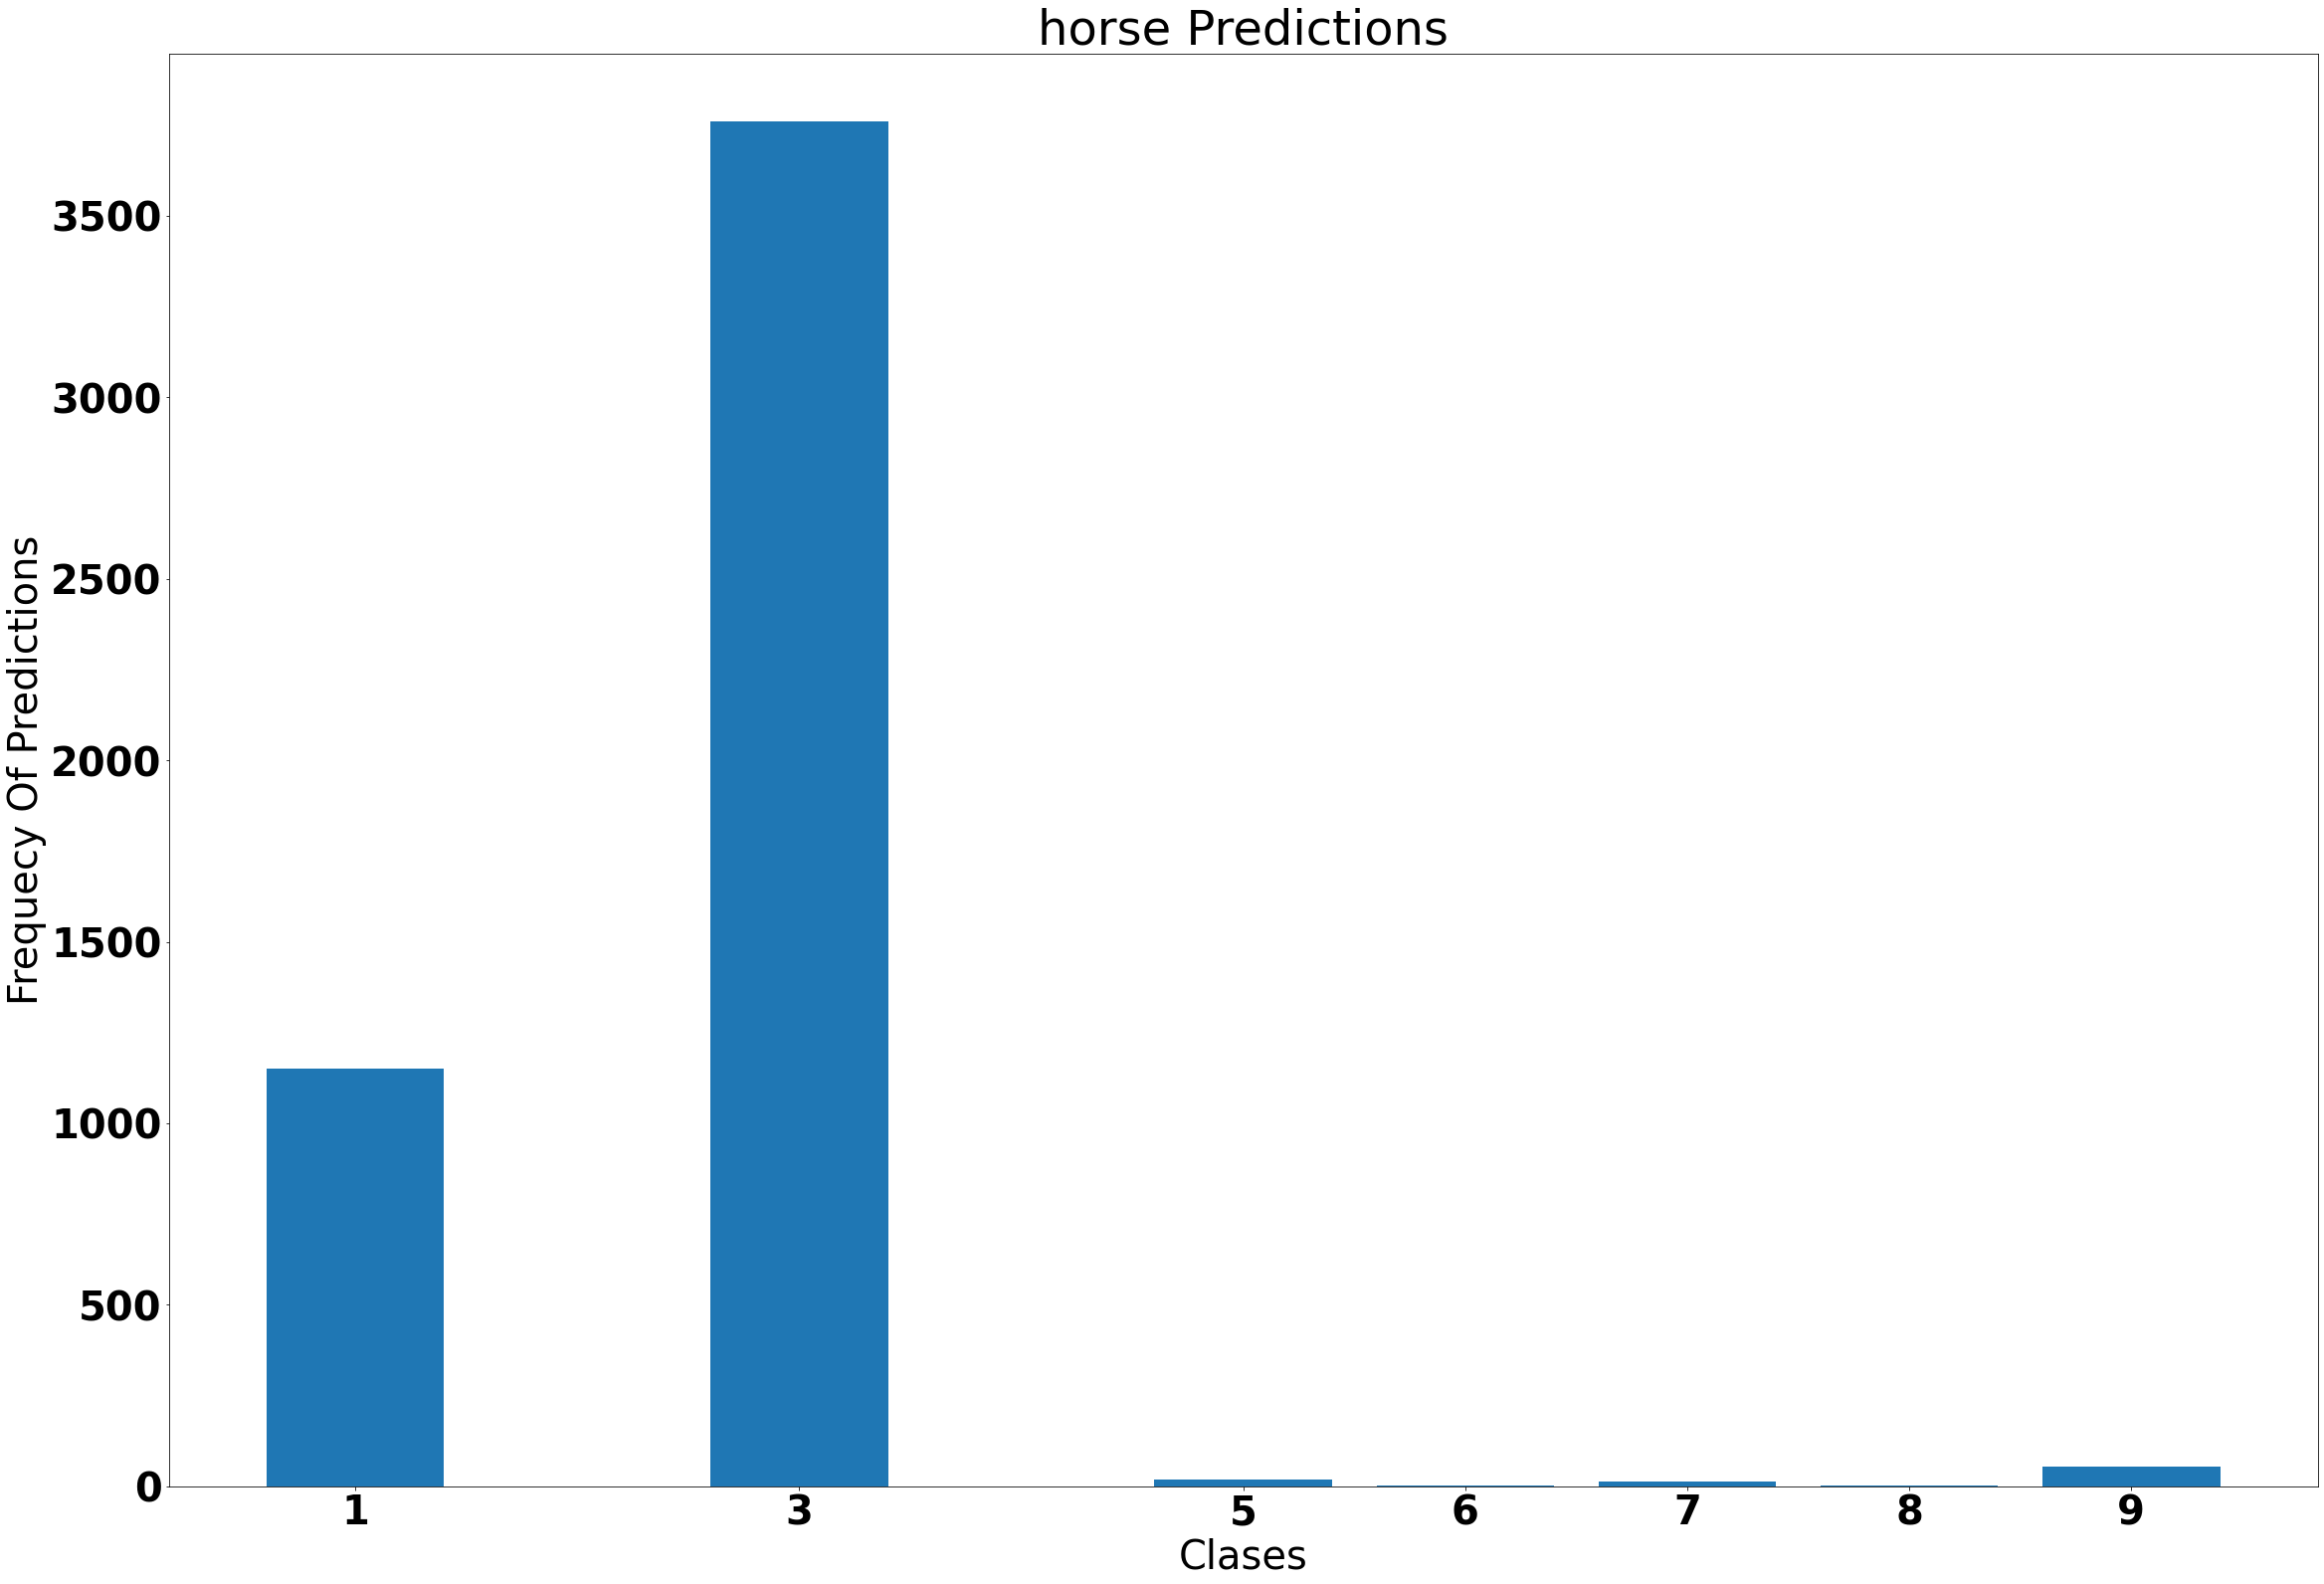

In [22]:
idx = 7
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #8


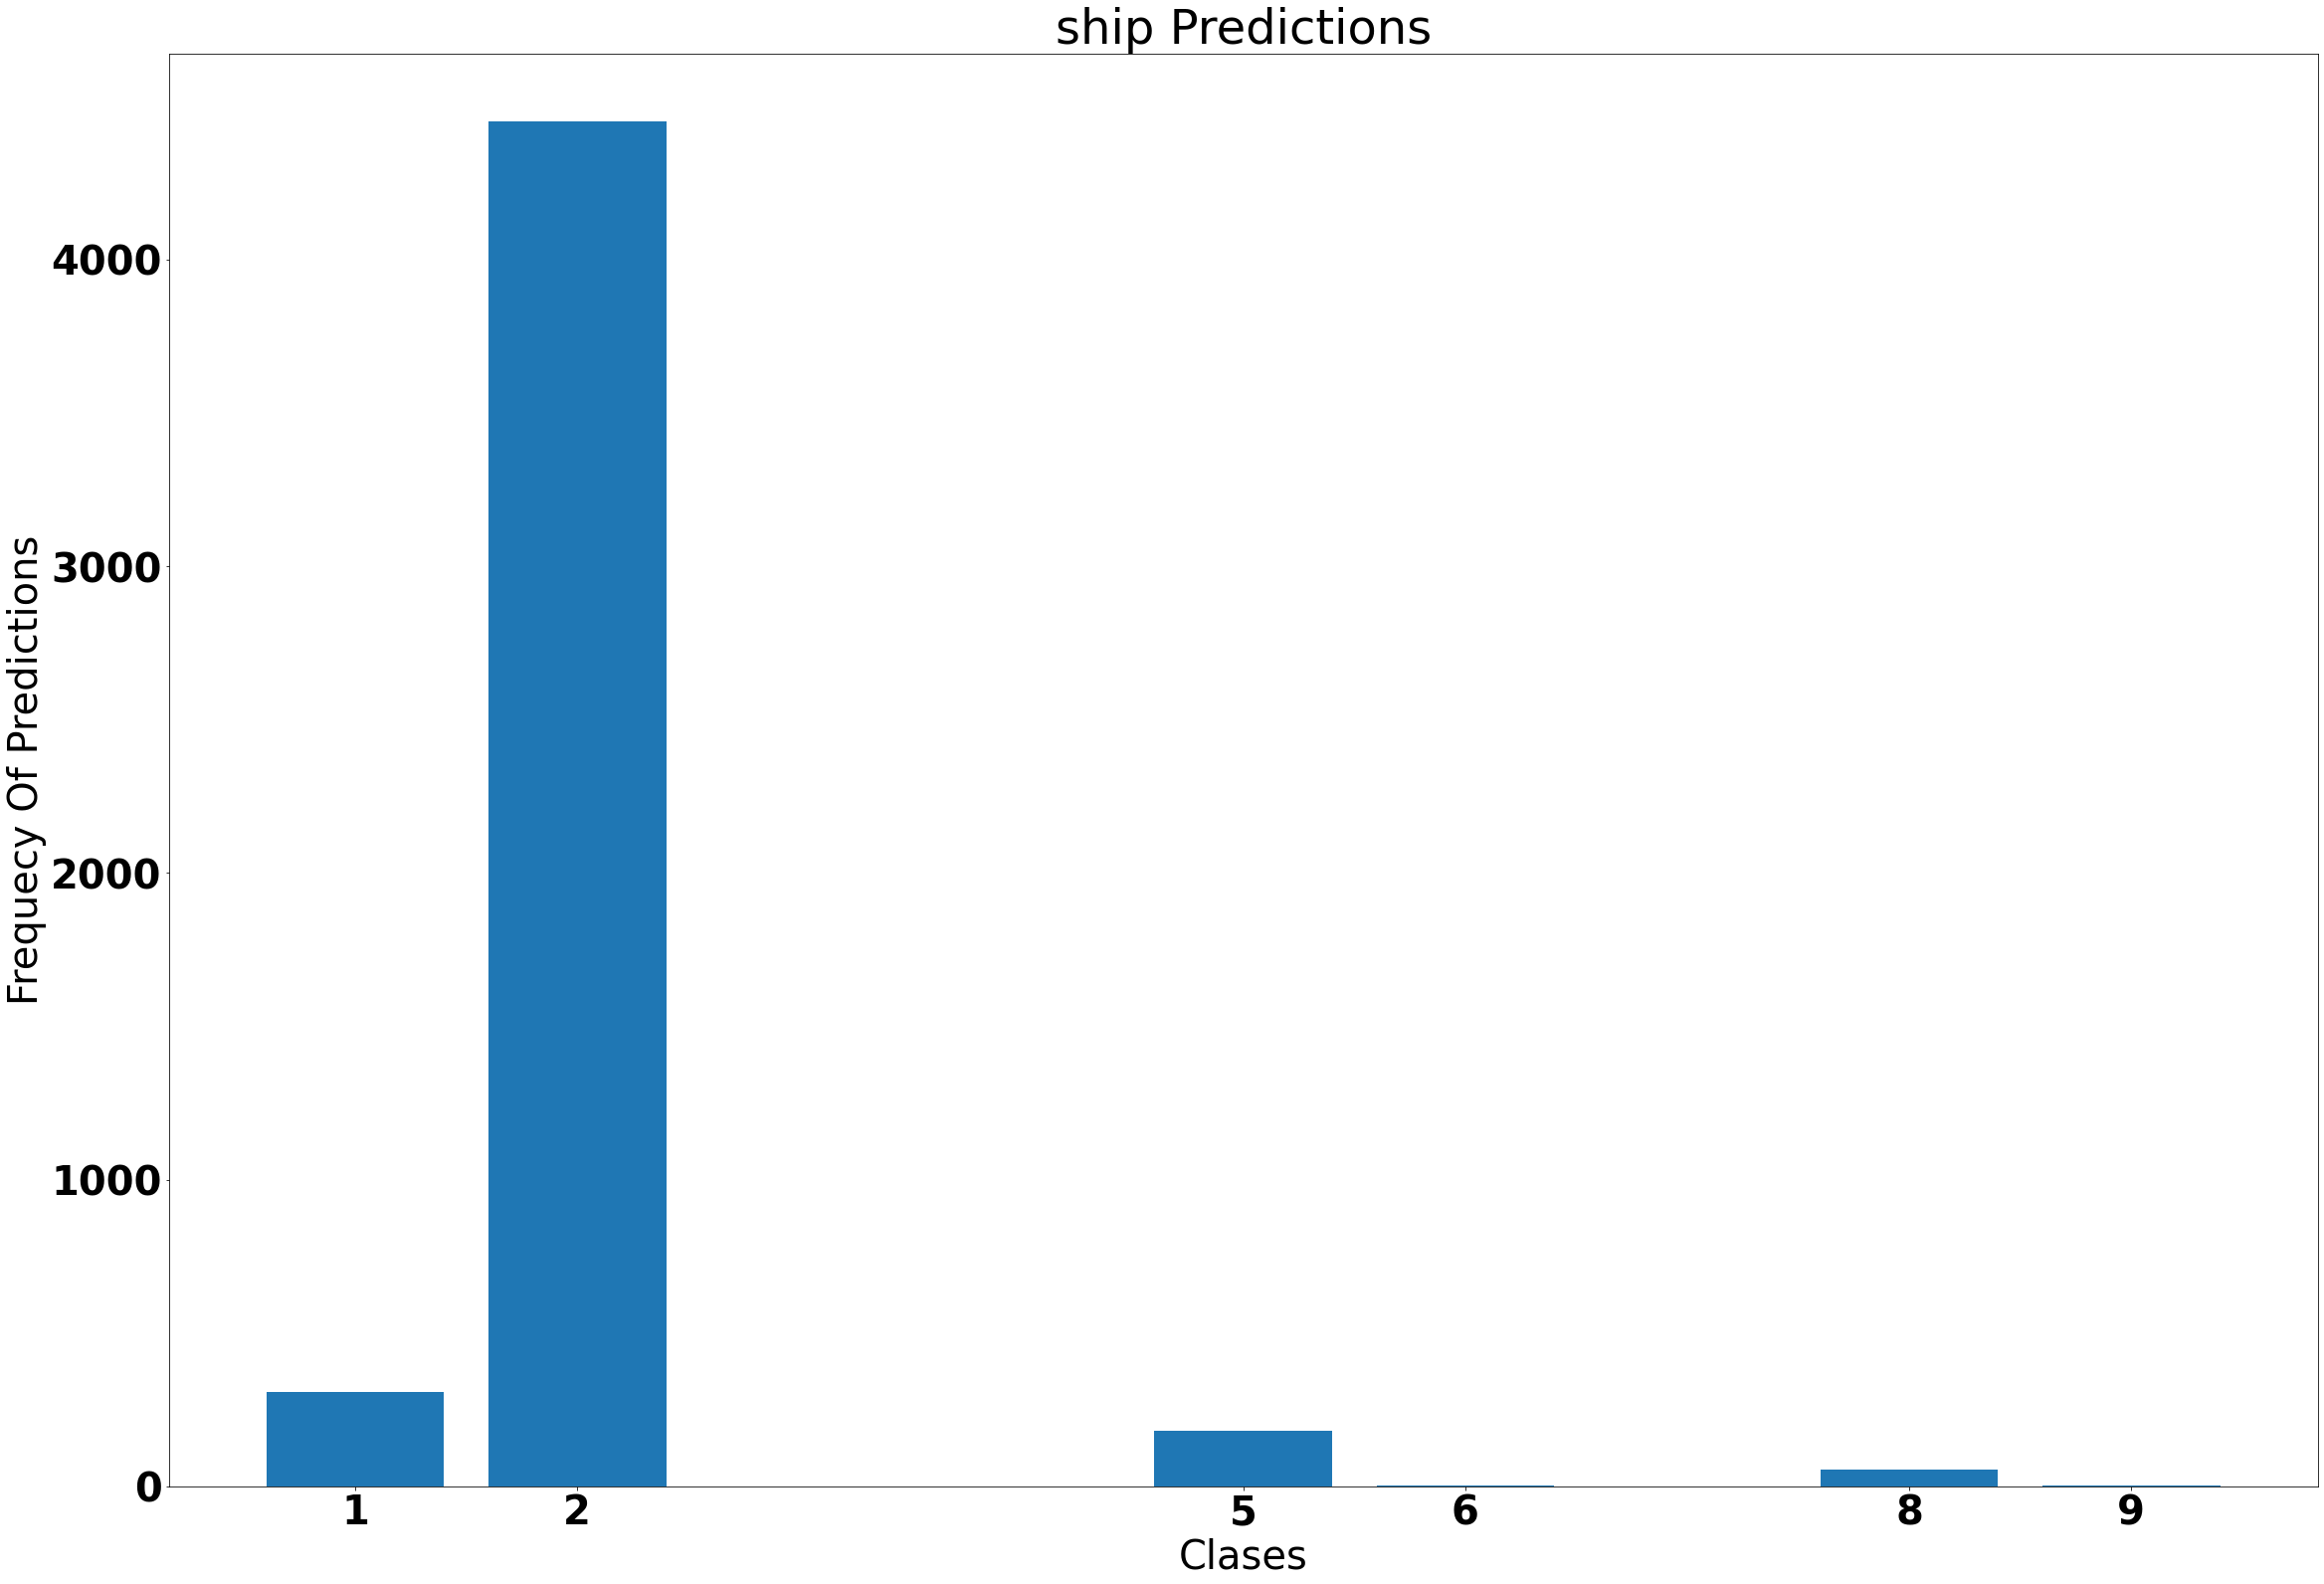

In [23]:
idx = 8
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #9


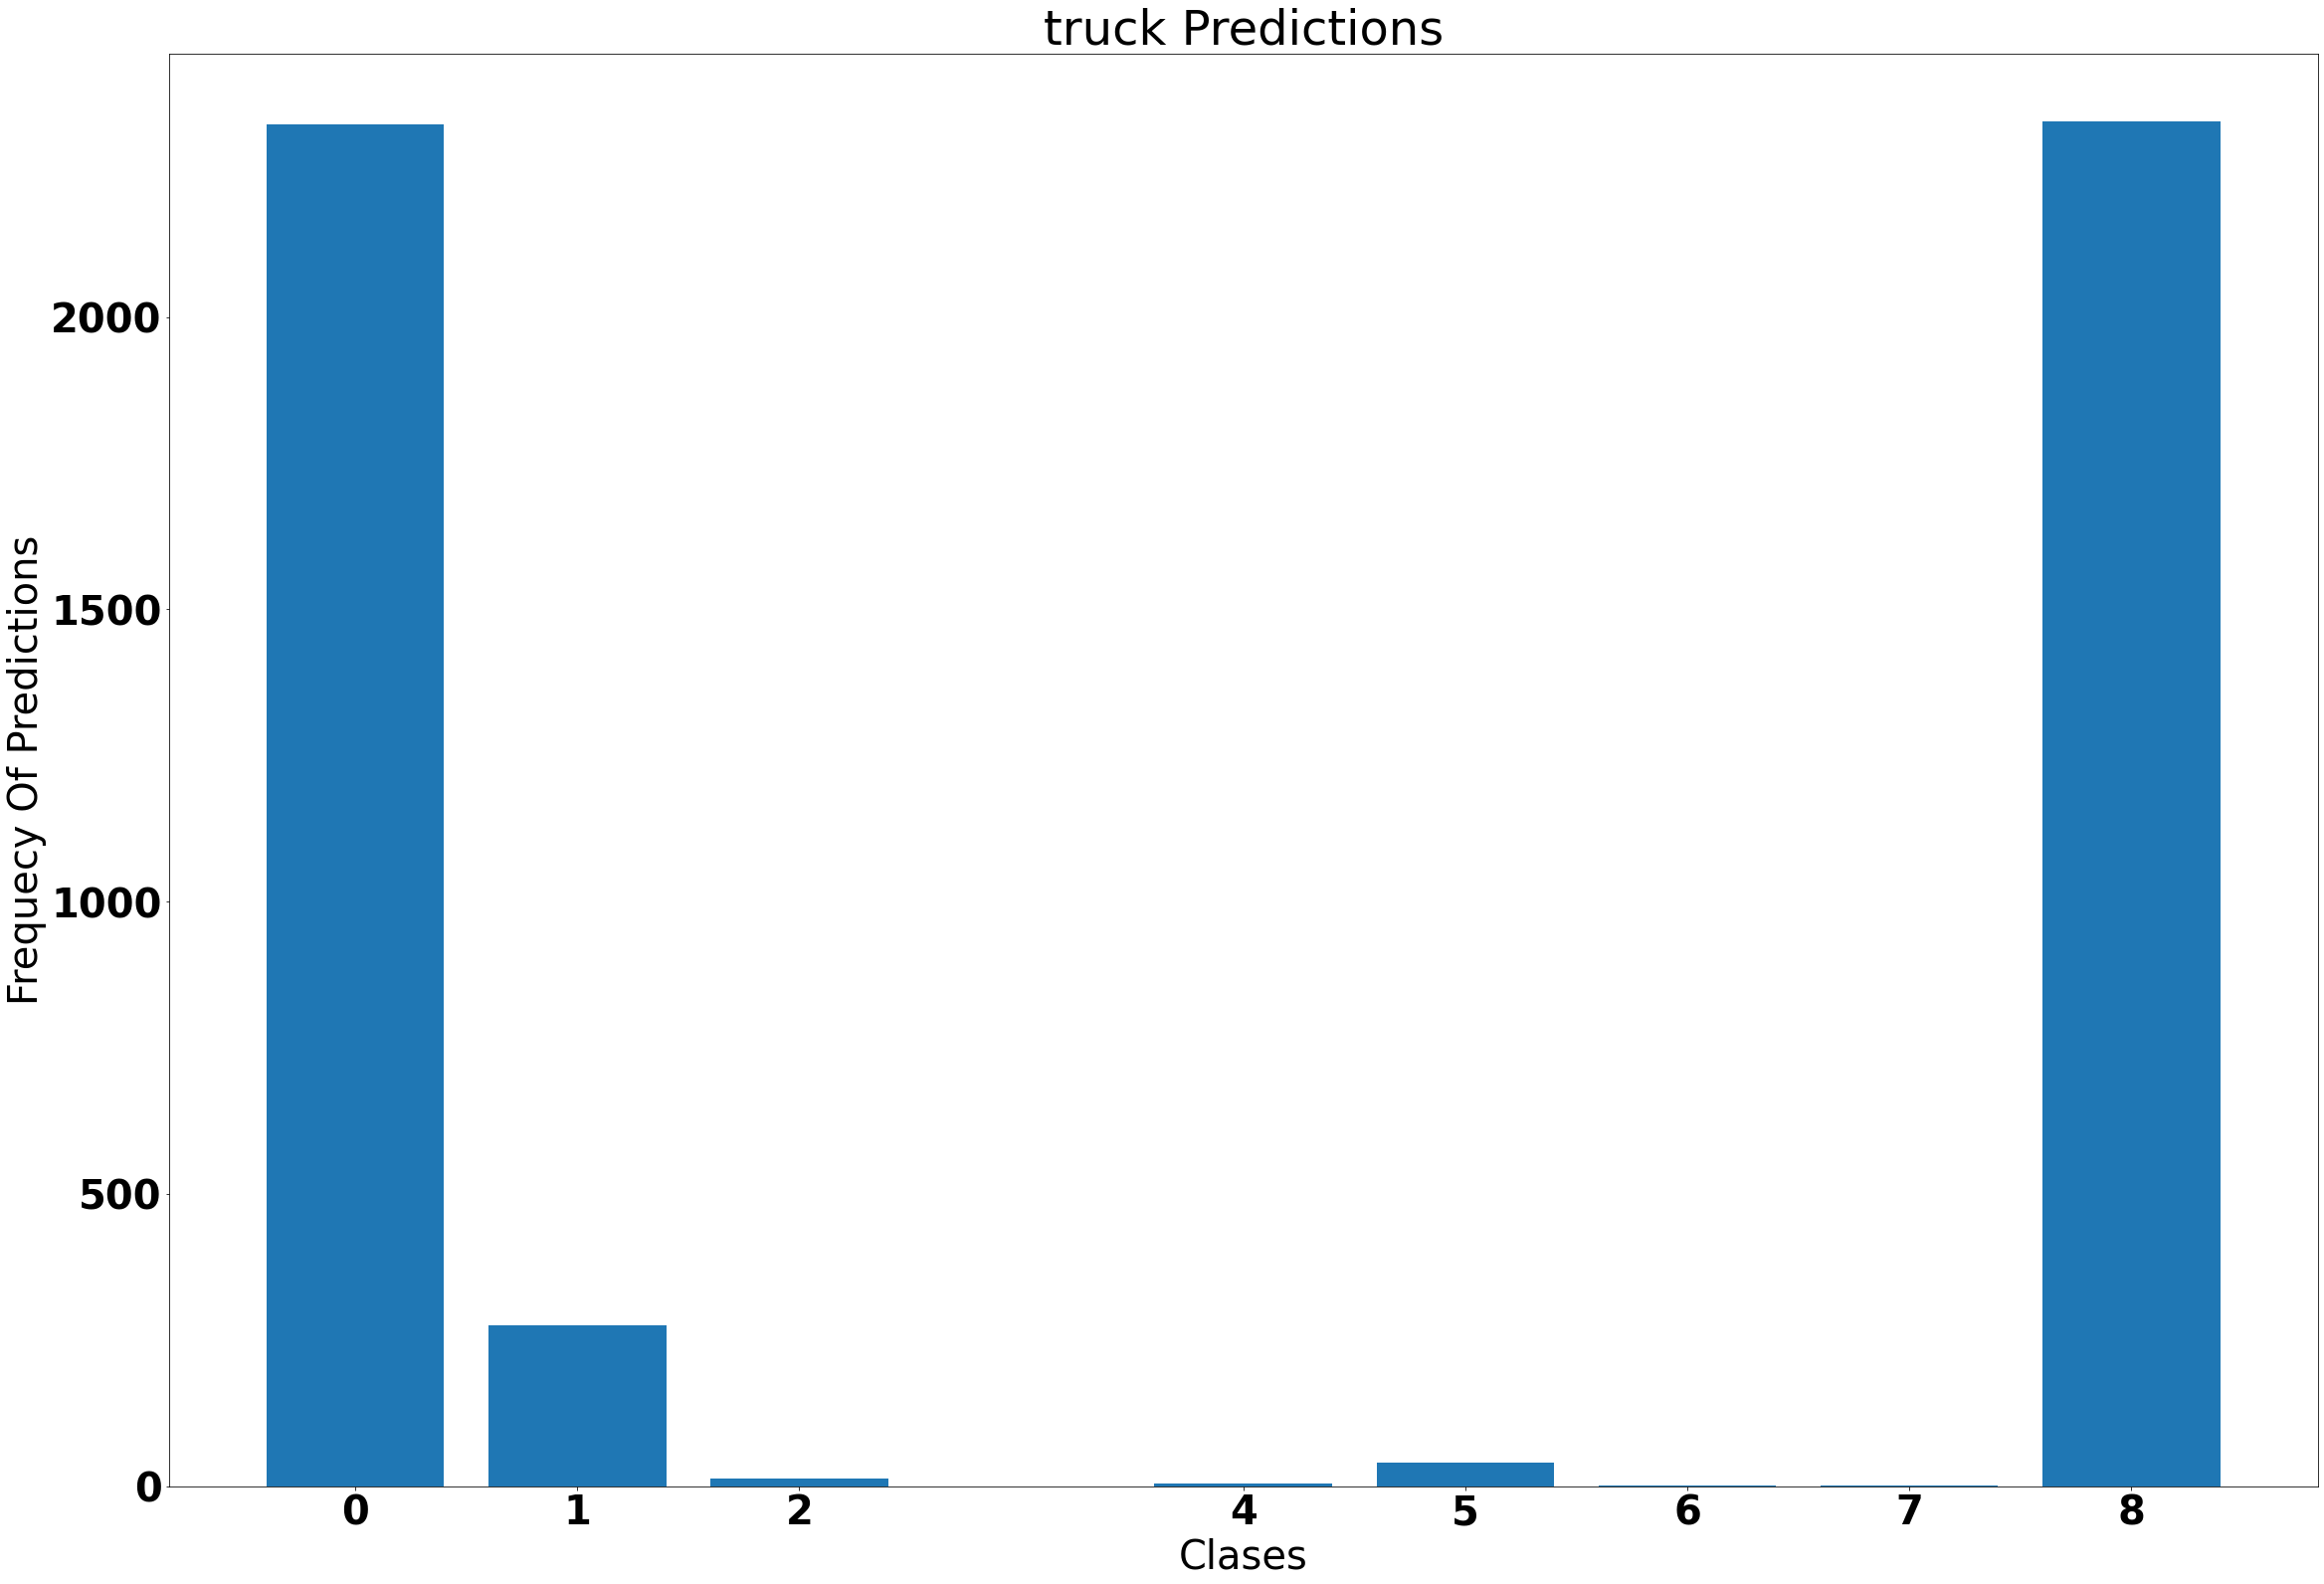

In [24]:
idx = 9
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

In [25]:
def plot_class_pdf(vals, idx):
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 30}
    matplotlib.rc('font', **font)
    print("Mean: {}".format(stat.mean(vals)))
    print("Variance: {}".format(np.var(vals)))
    print("Standard Deviation: {}".format(np.std(vals)))
    plt.figure( figsize = (40, 30), facecolor = 'gray')
    plt.hist(vals, color = 'blue', edgecolor = 'black',
             bins = int(180/5))
    # Add labels
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
    plt.title('Histogram of cluster distance of each Prediction for {}'.format(classes[idx]))
    plt.xlabel('Cluster Distance')
    plt.ylabel('# of Predictions')
    #plt.set_facecolor('gray')
    plt.show()

NameError: name 'vals' is not defined

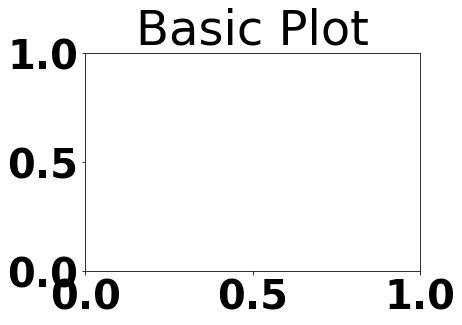

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(vals[:,idx])

In [ ]:
idx = 0
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

In [ ]:
idx = 1
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

In [ ]:
idx = 2
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.9872865676879883
Variance: 0.1626754254102707
Standard Deviation: 0.40333041548728943


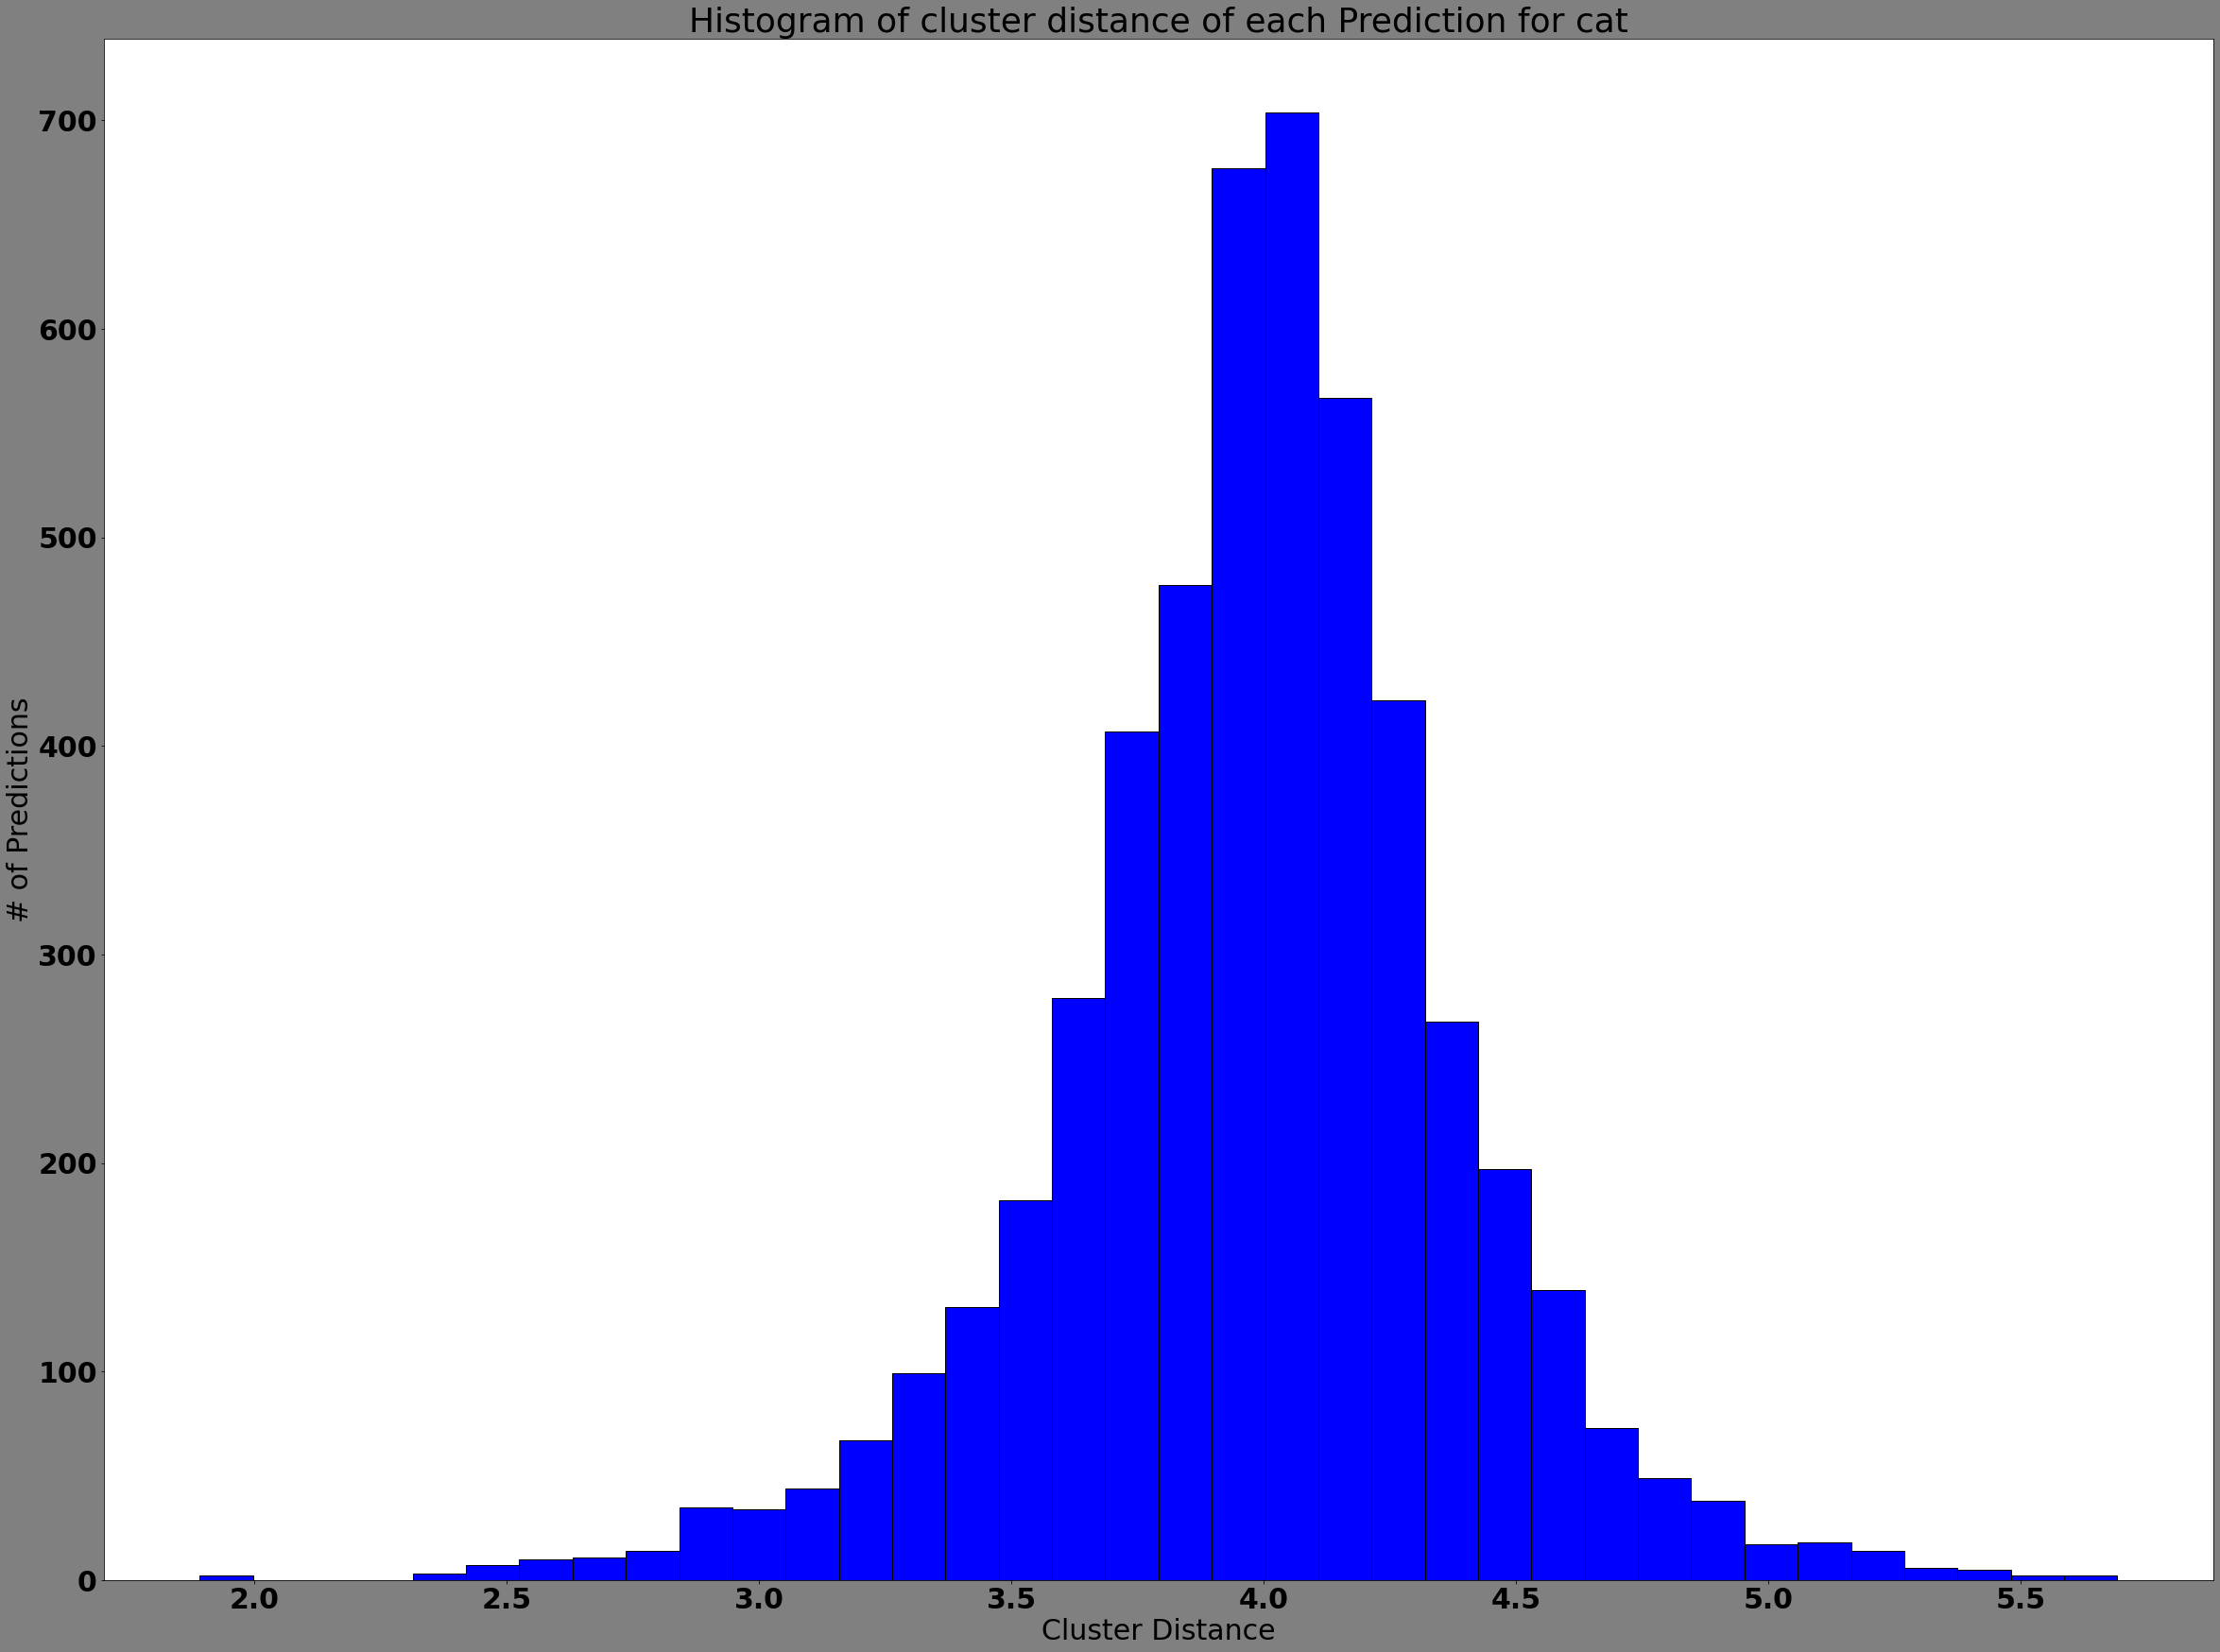

In [27]:
idx = 3
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 8.059364318847656
Variance: 0.05936935916543007
Standard Deviation: 0.24365828931331635


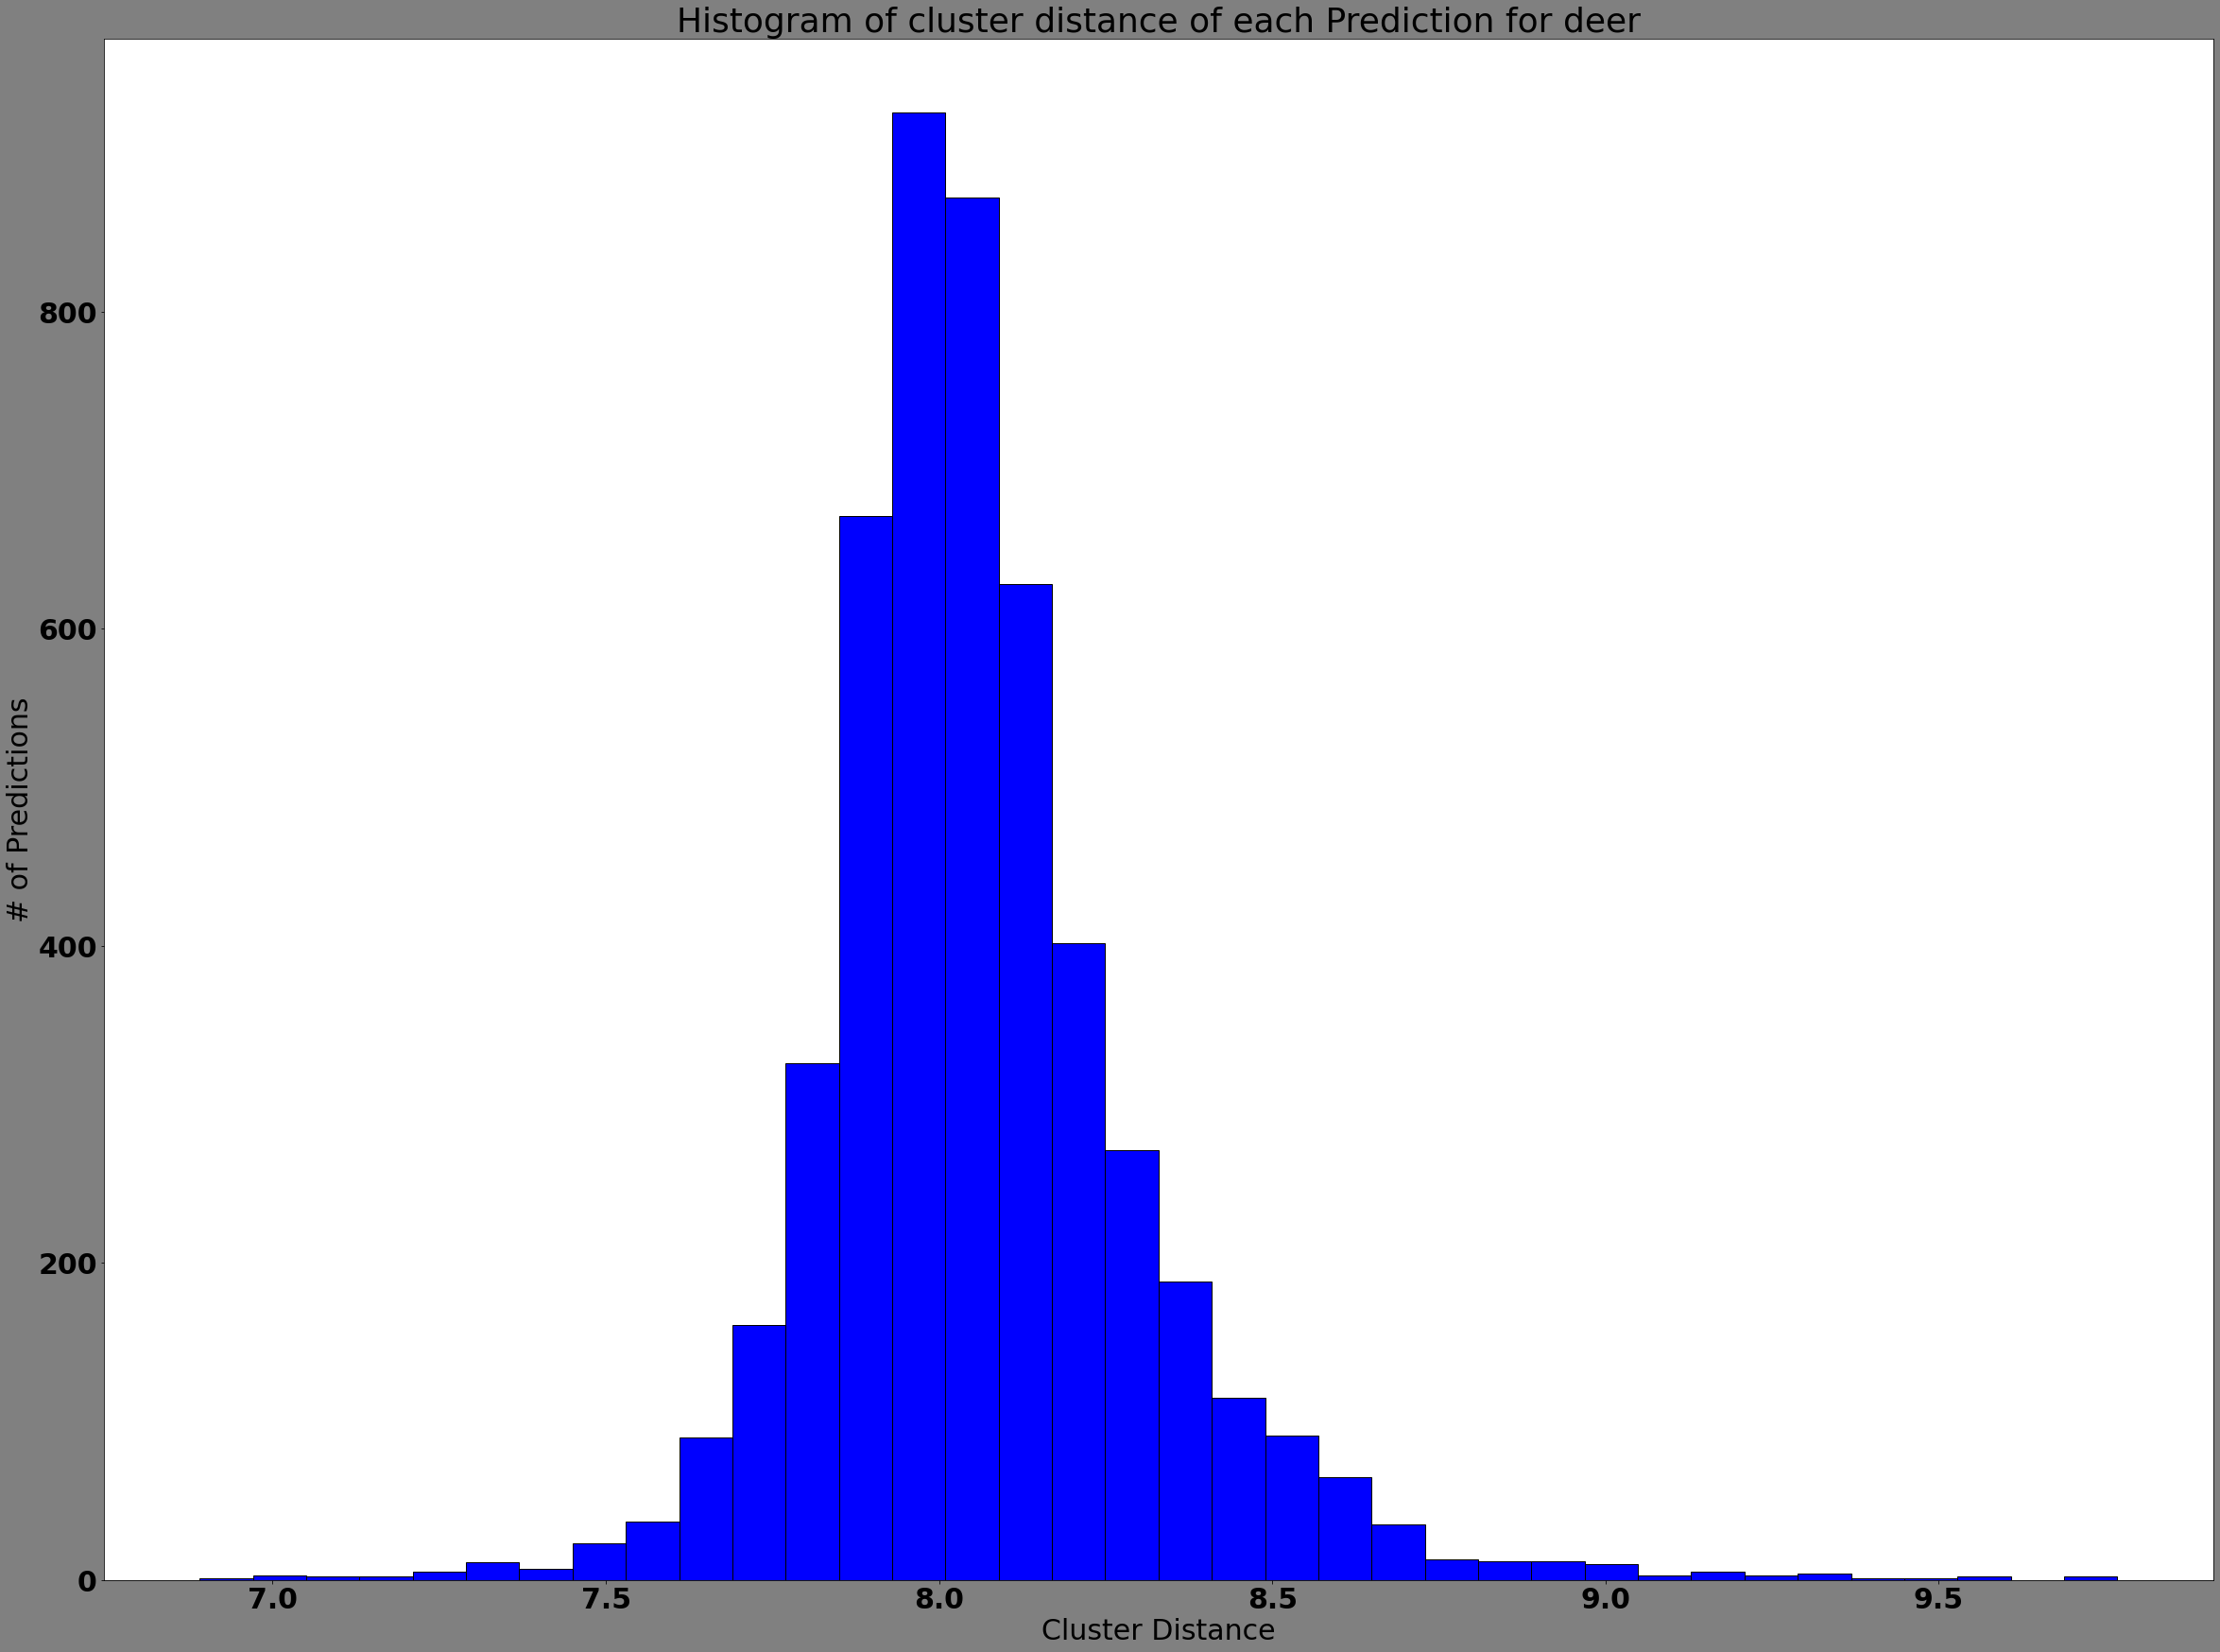

In [28]:
idx = 4
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.4860315322875977
Variance: 1.0003057718276978
Standard Deviation: 1.000152826309204


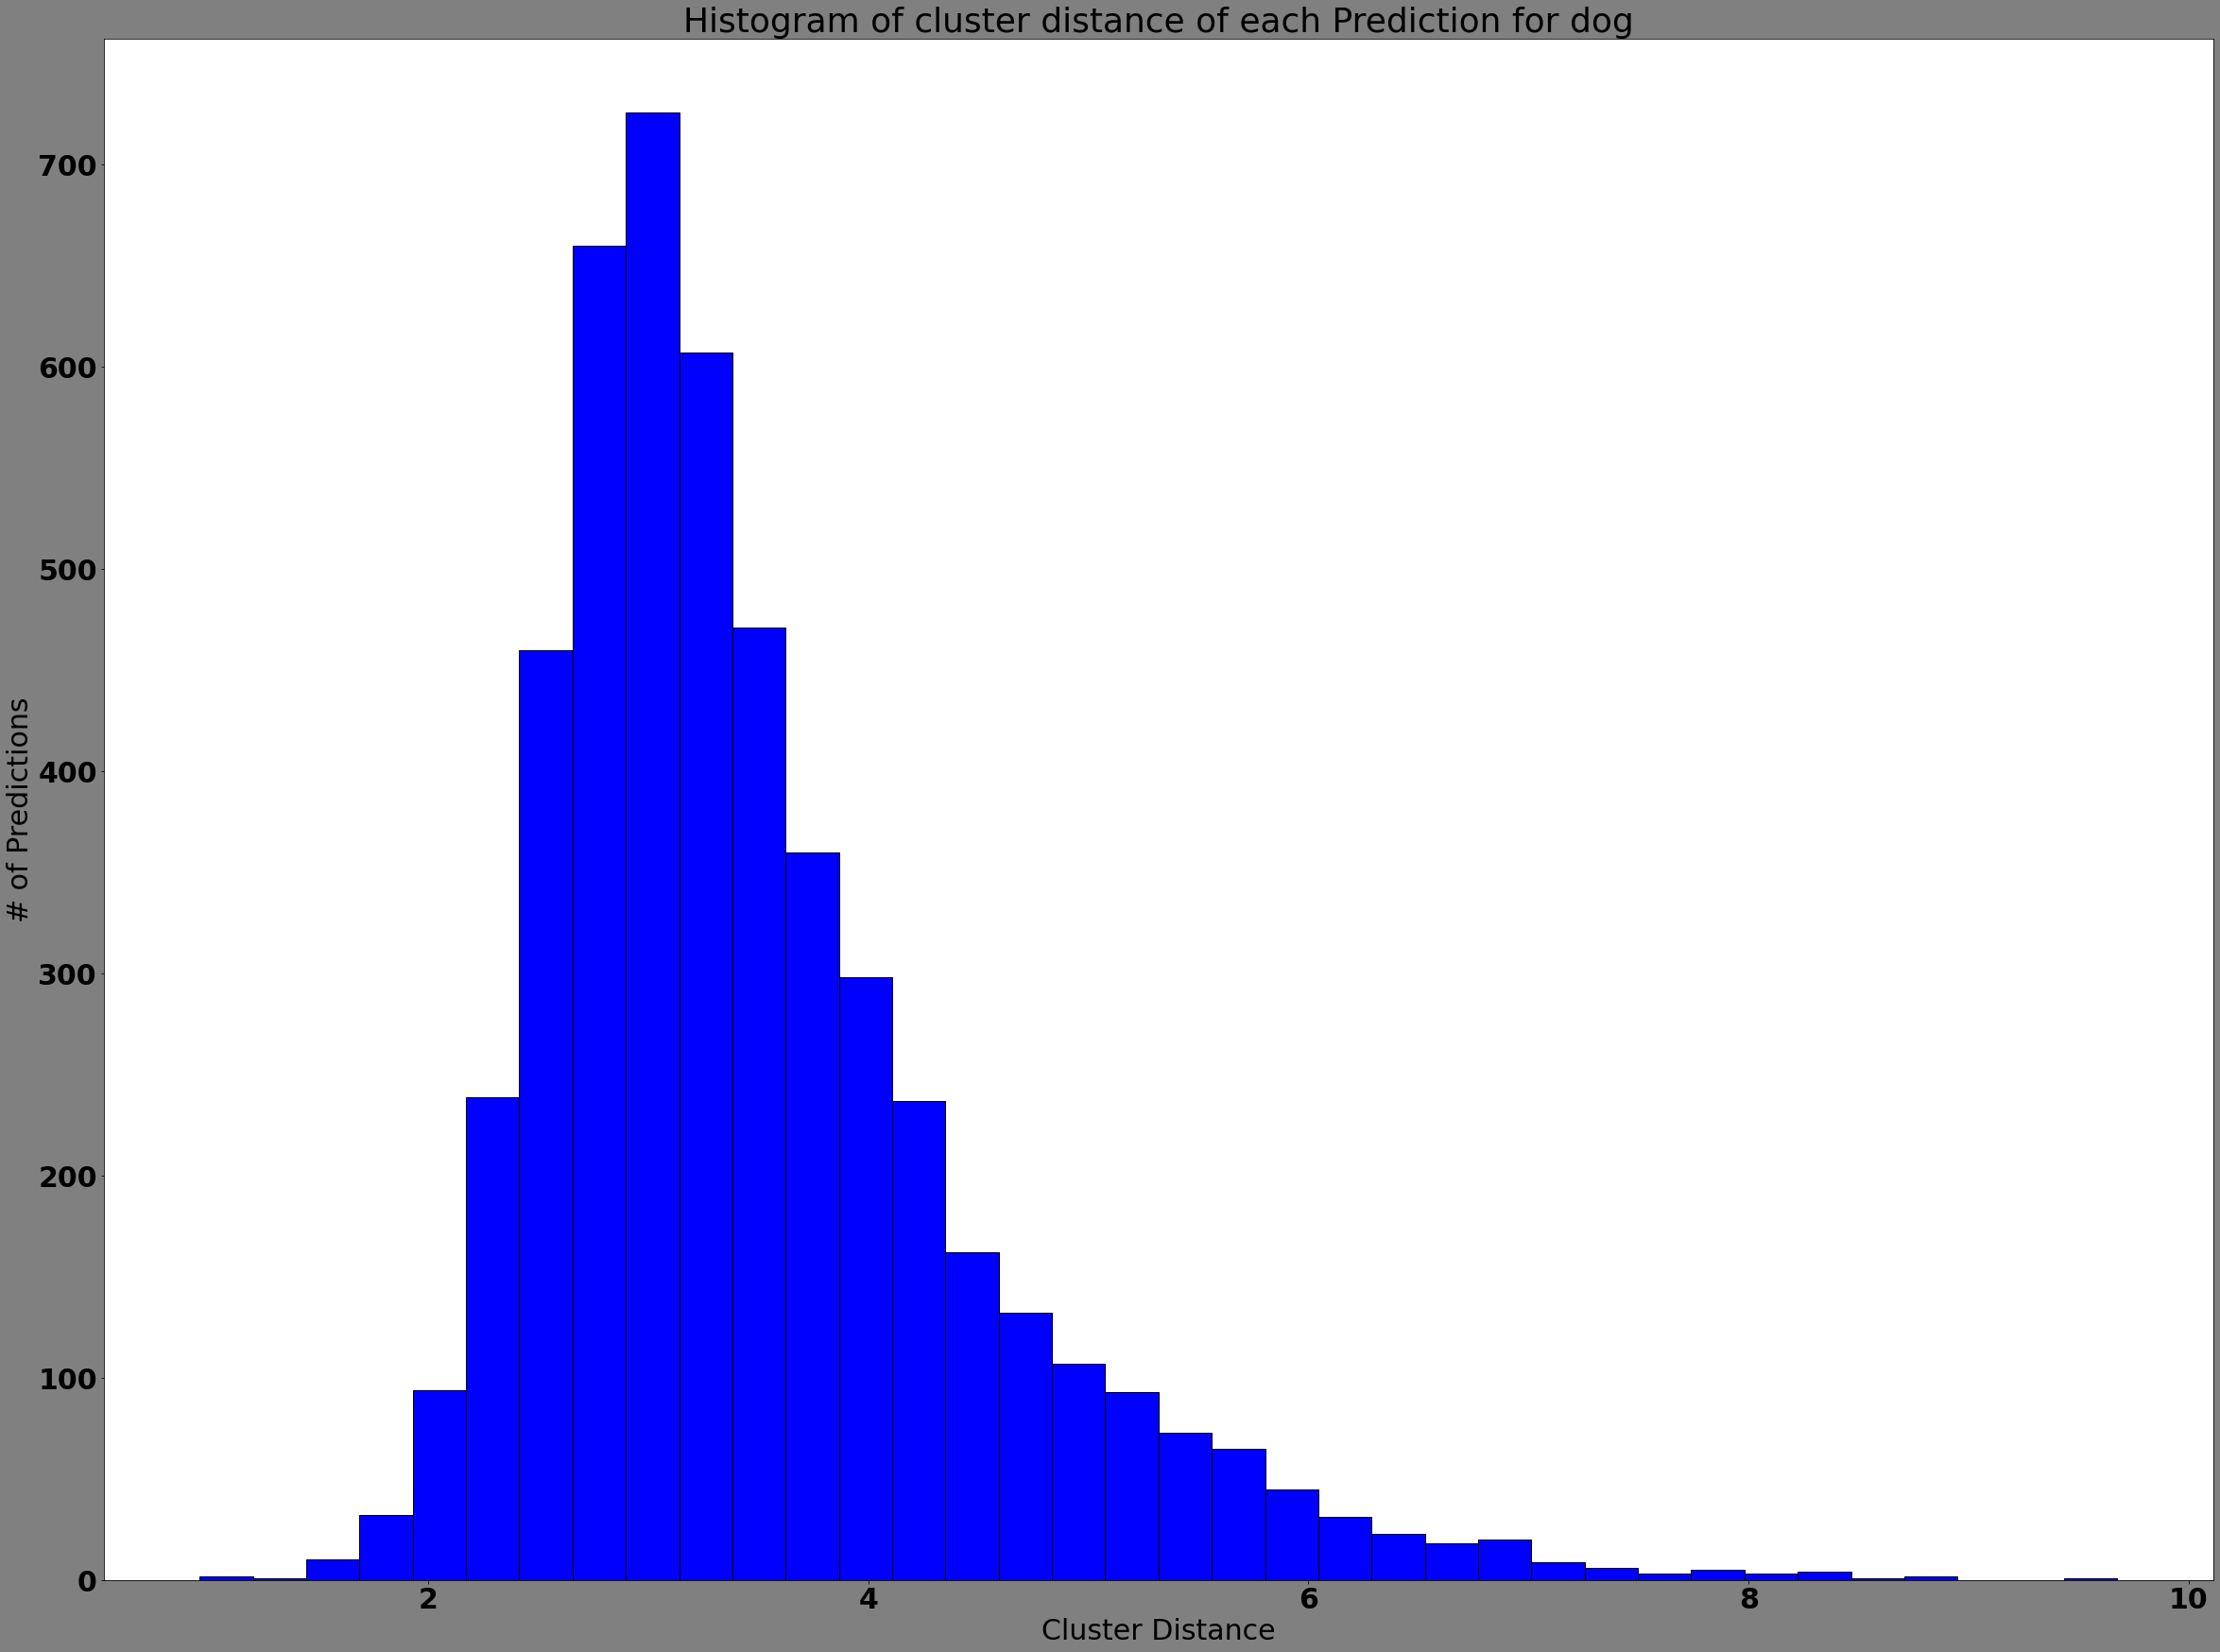

In [29]:
idx = 5
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 1.4083716869354248
Variance: 0.5329625010490417
Standard Deviation: 0.7300428152084351


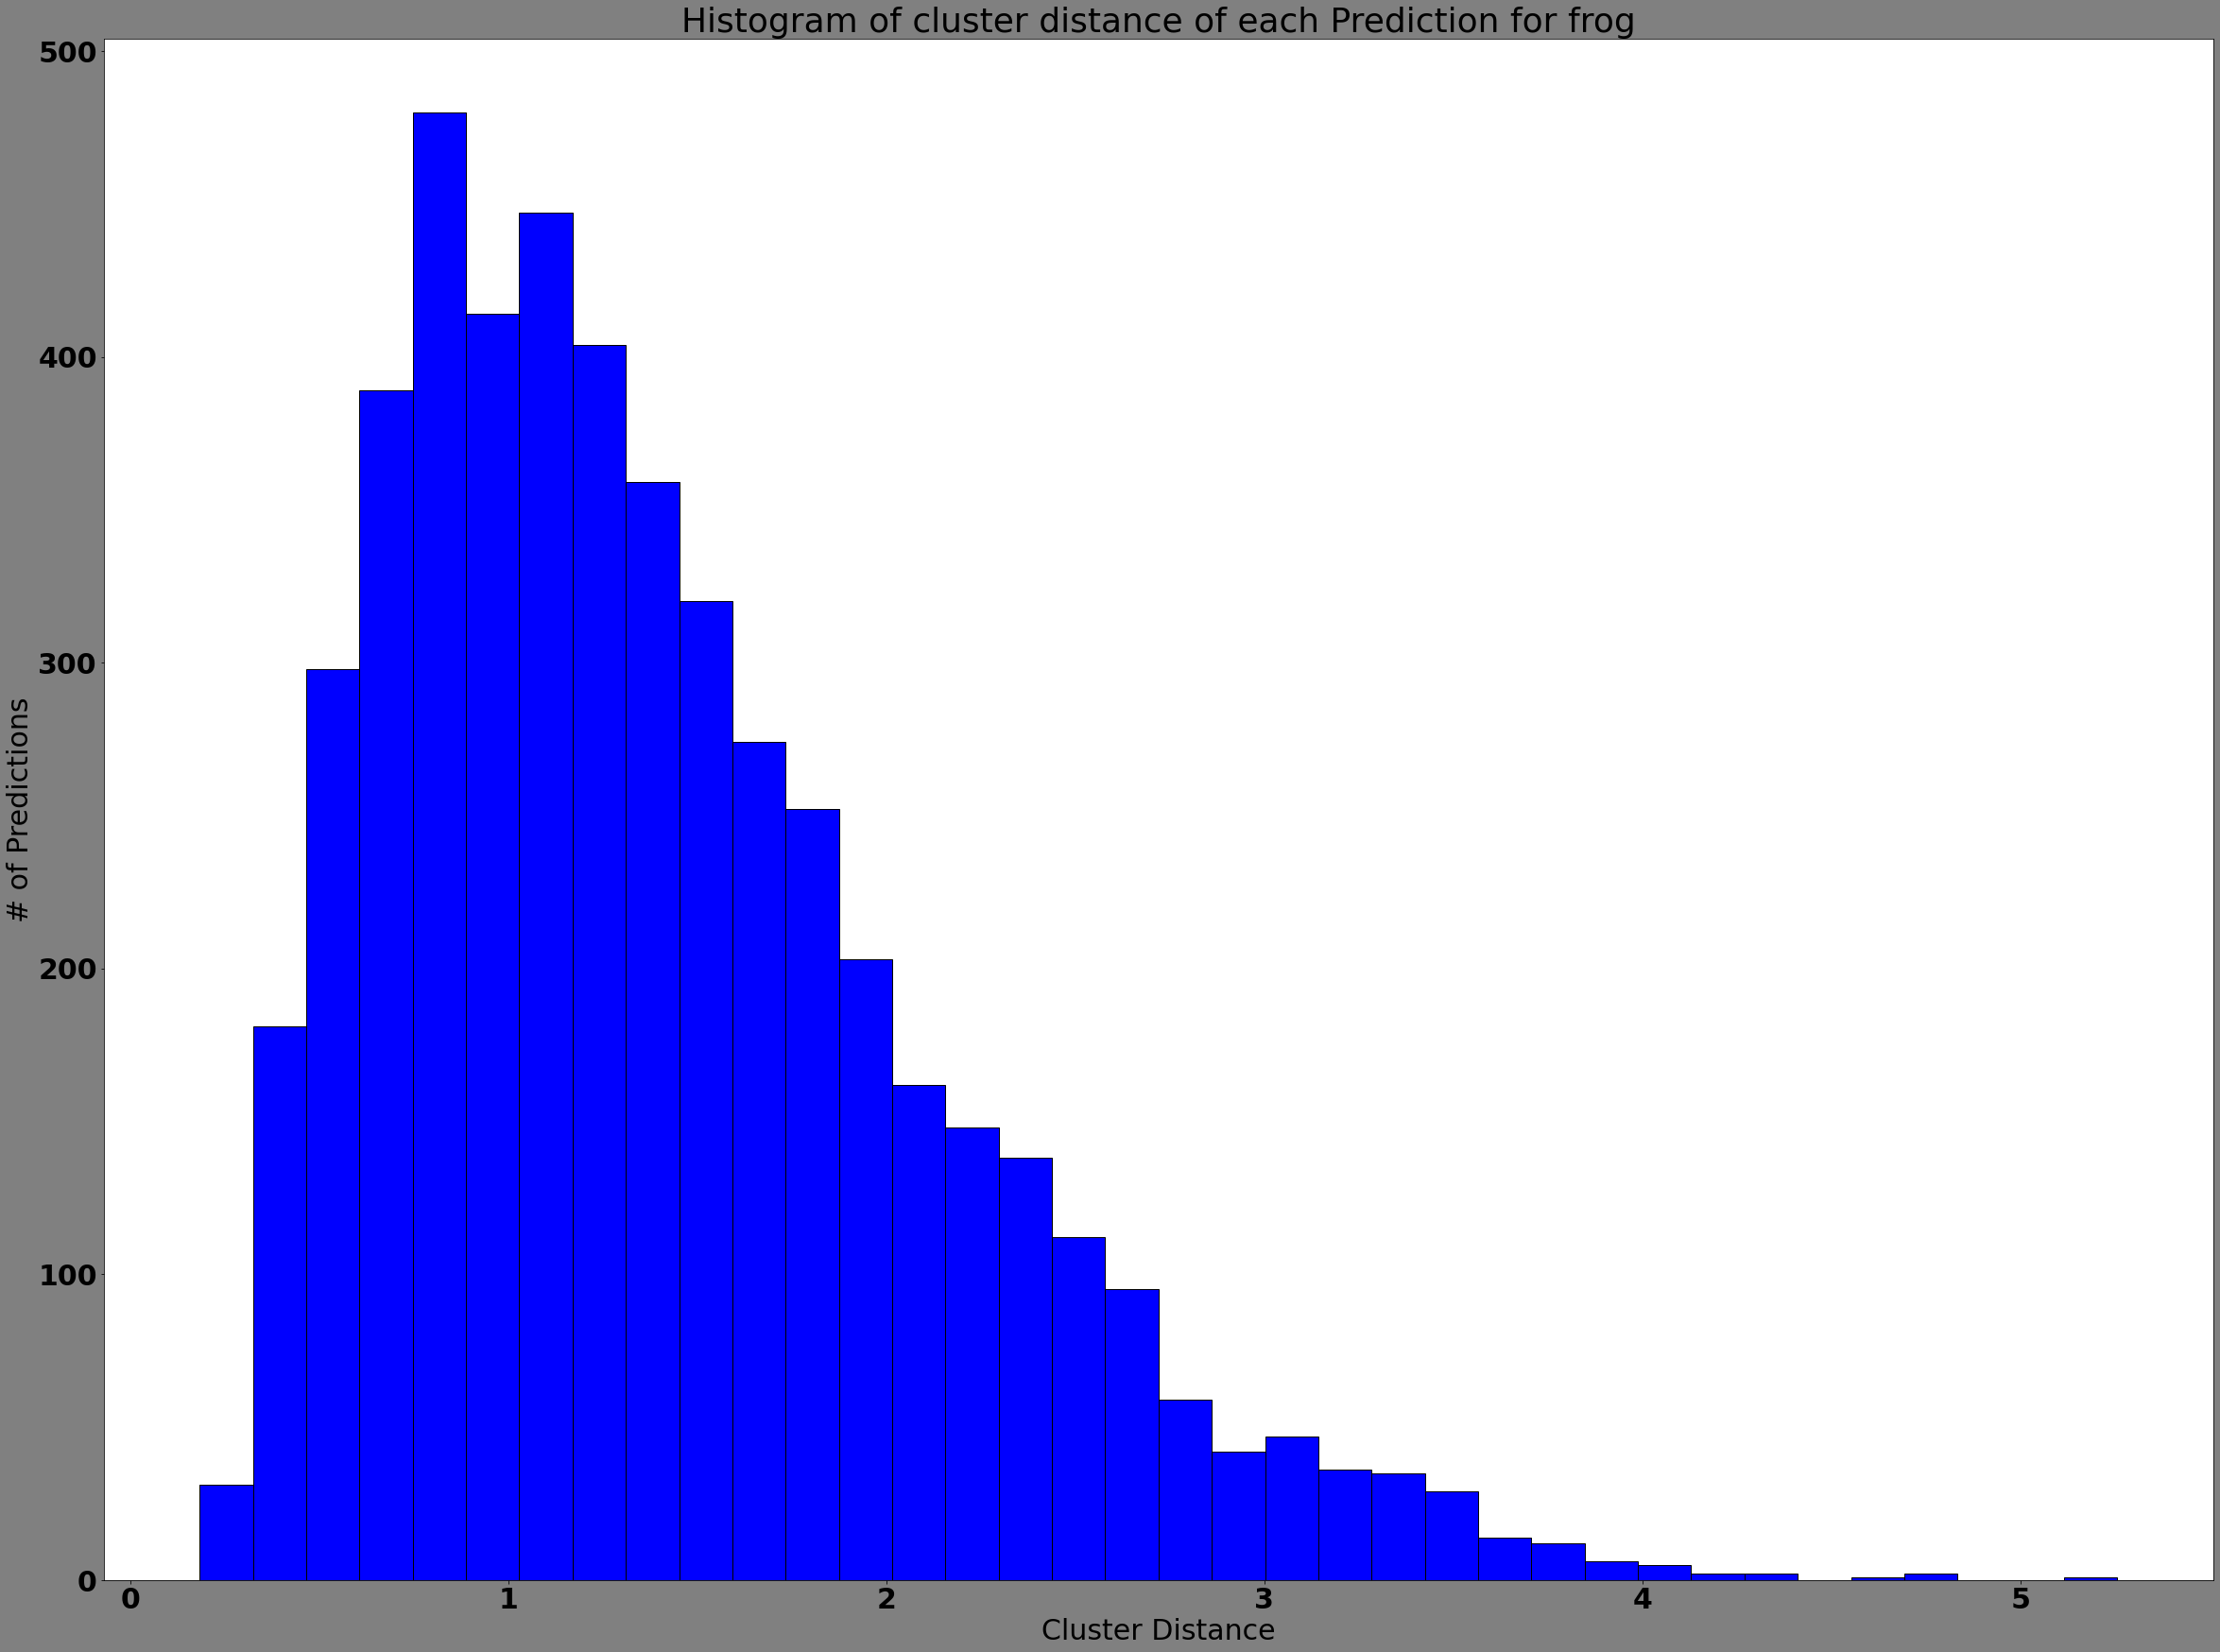

In [30]:
idx = 6
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 1.4083716869354248
Variance: 0.5329625010490417
Standard Deviation: 0.7300428152084351


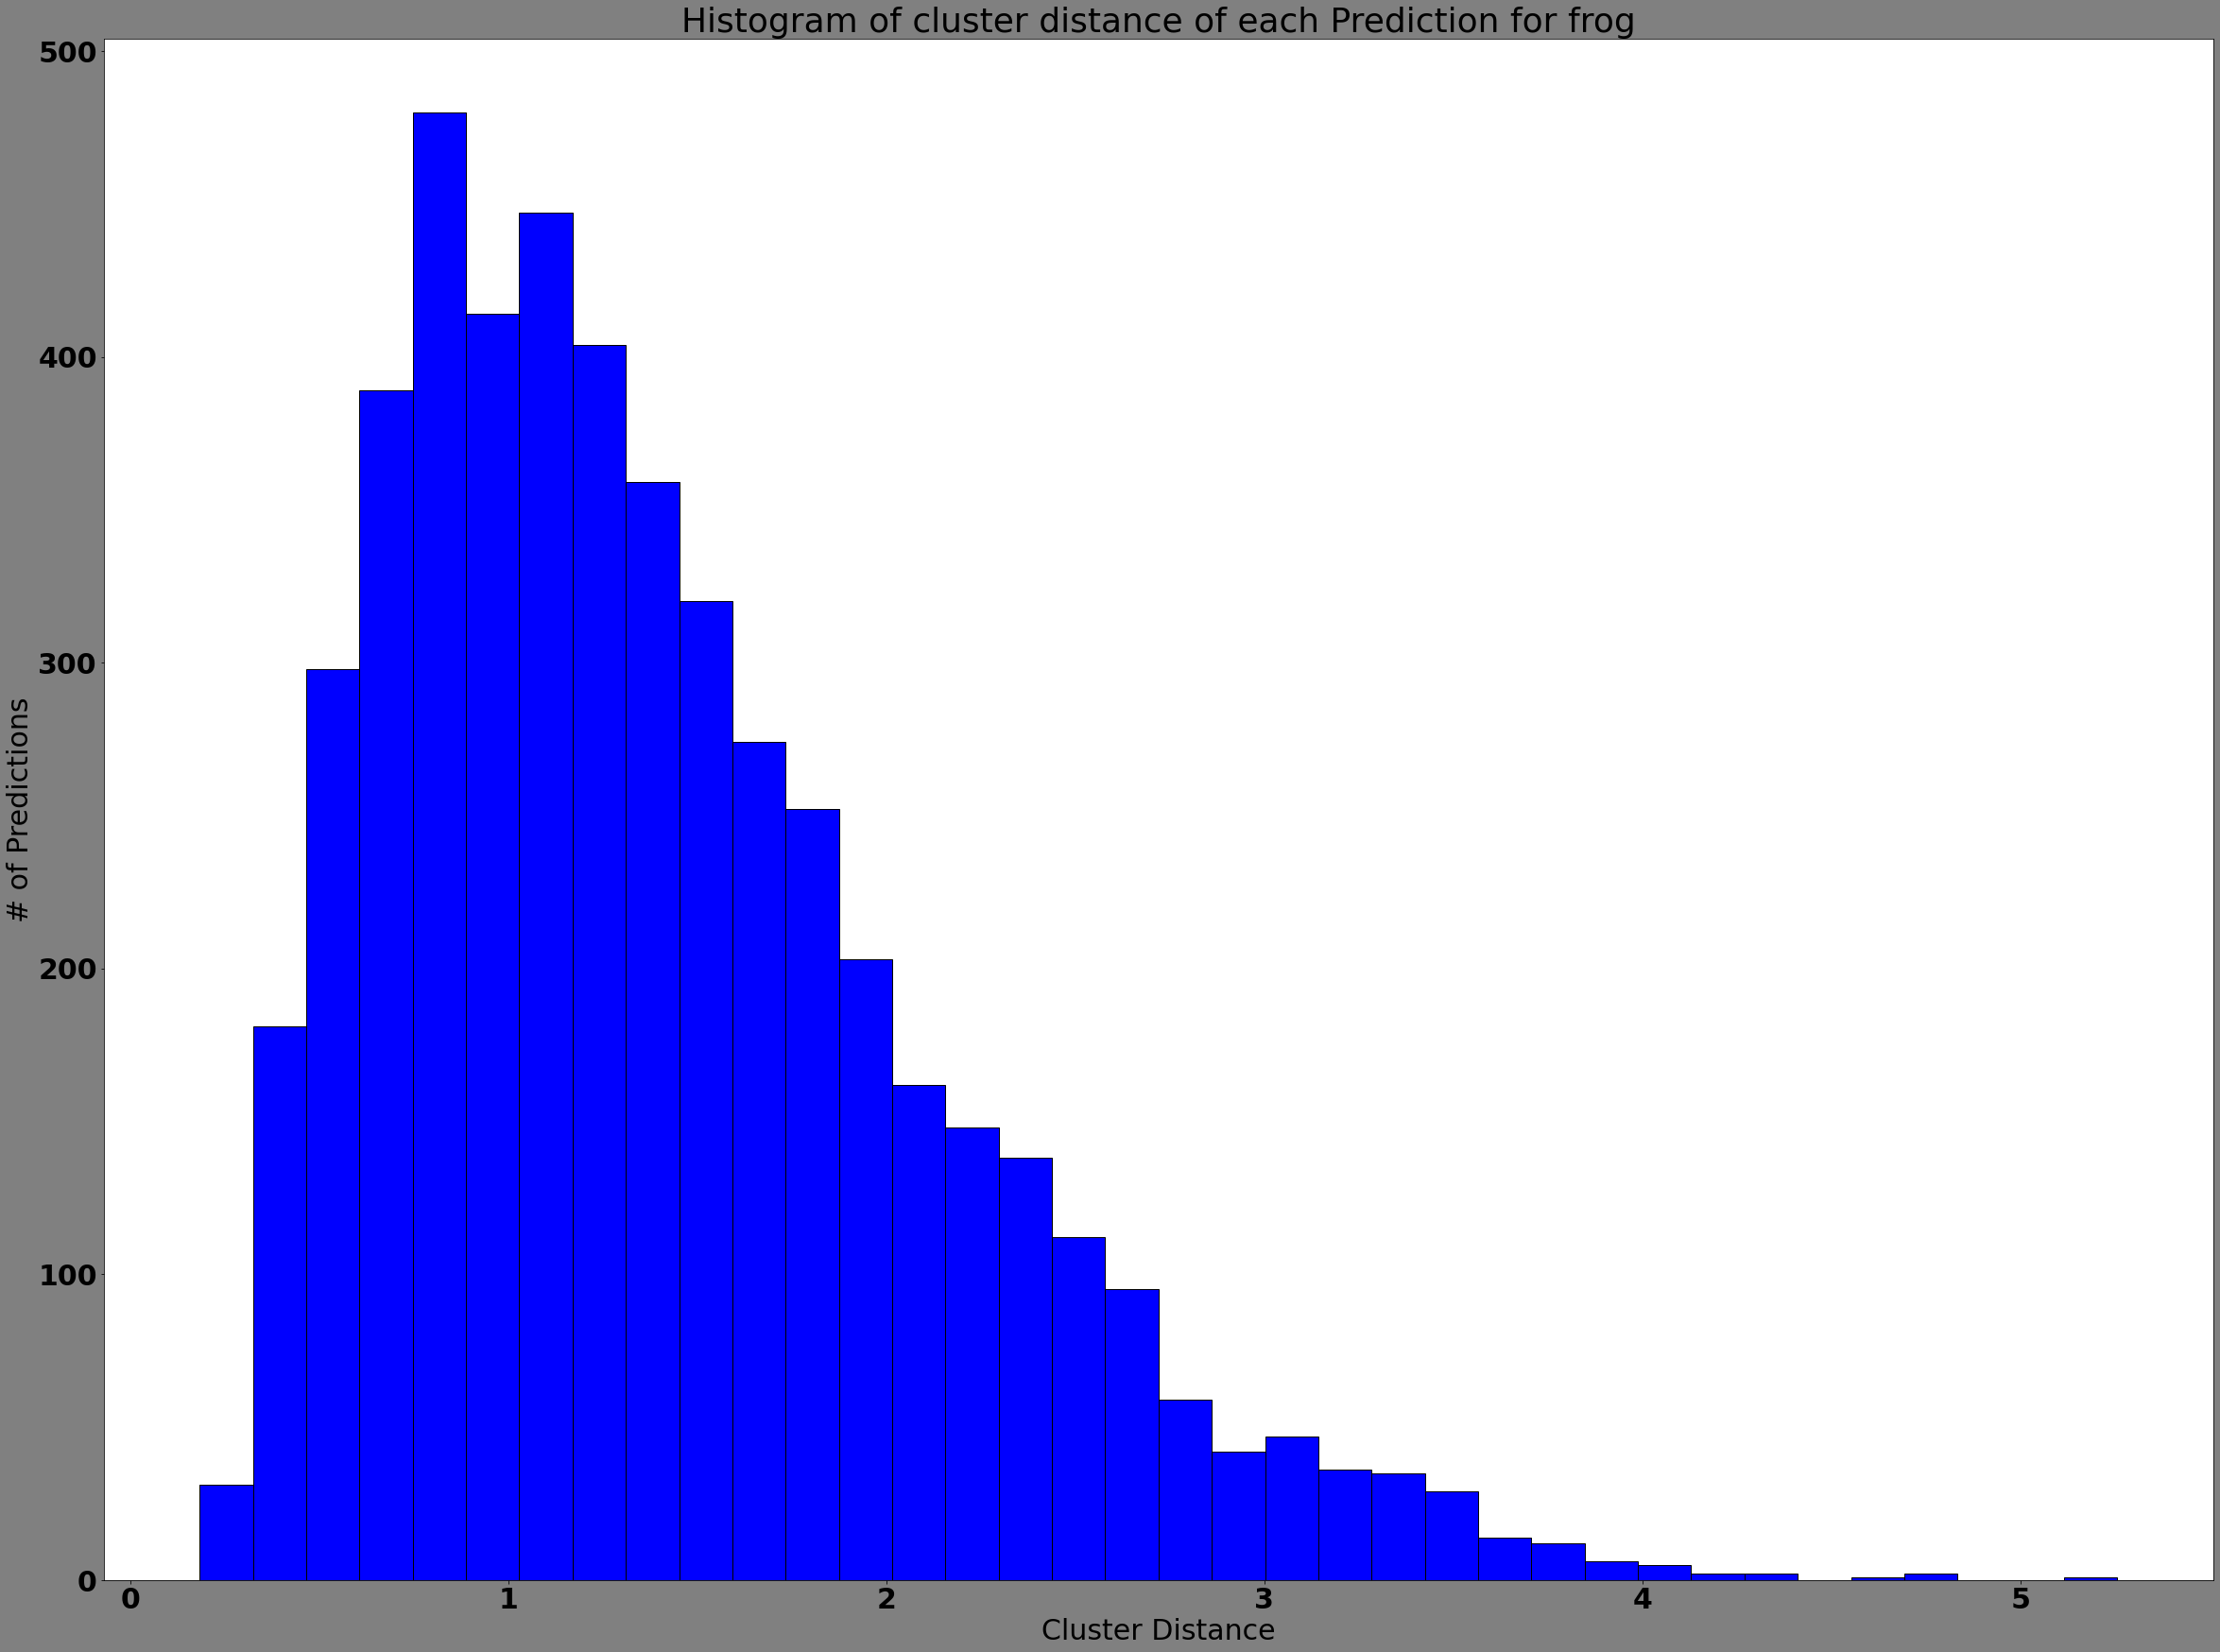

In [31]:
idx = 6
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.721841812133789
Variance: 0.5750927925109863
Standard Deviation: 0.7583487033843994


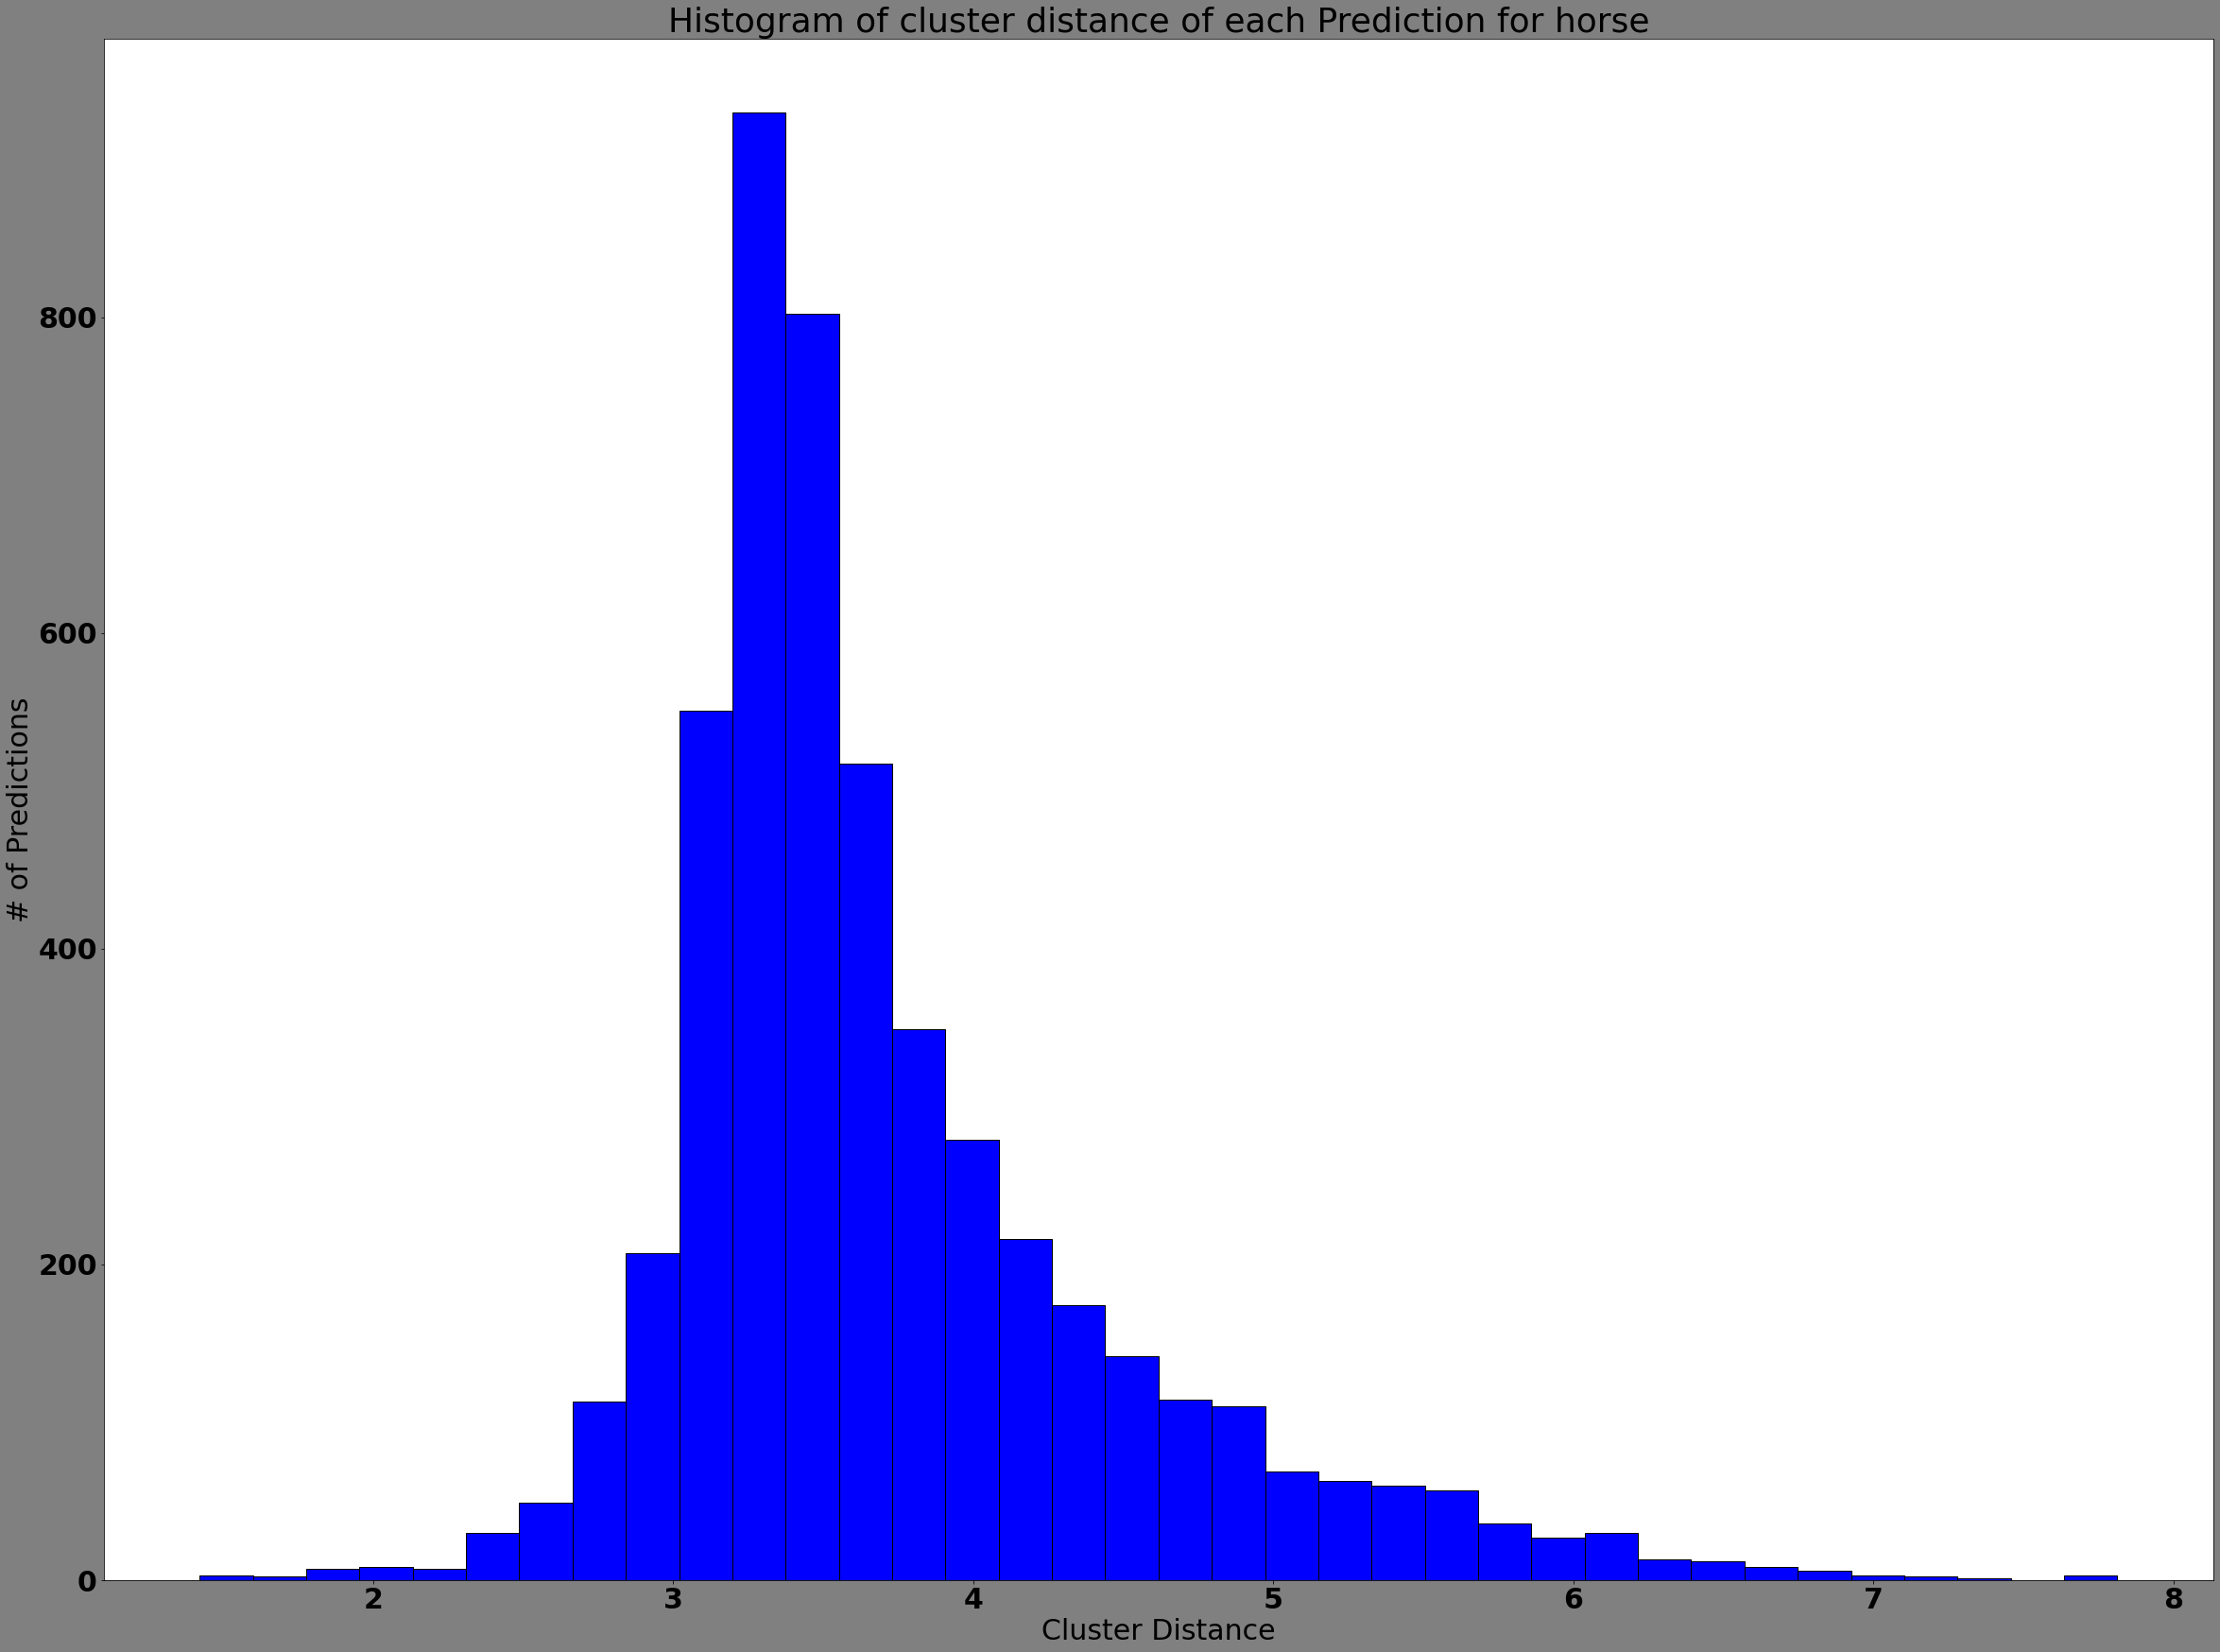

In [32]:
idx = 7
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.195582151412964
Variance: 0.5881581902503967
Standard Deviation: 0.7669147253036499


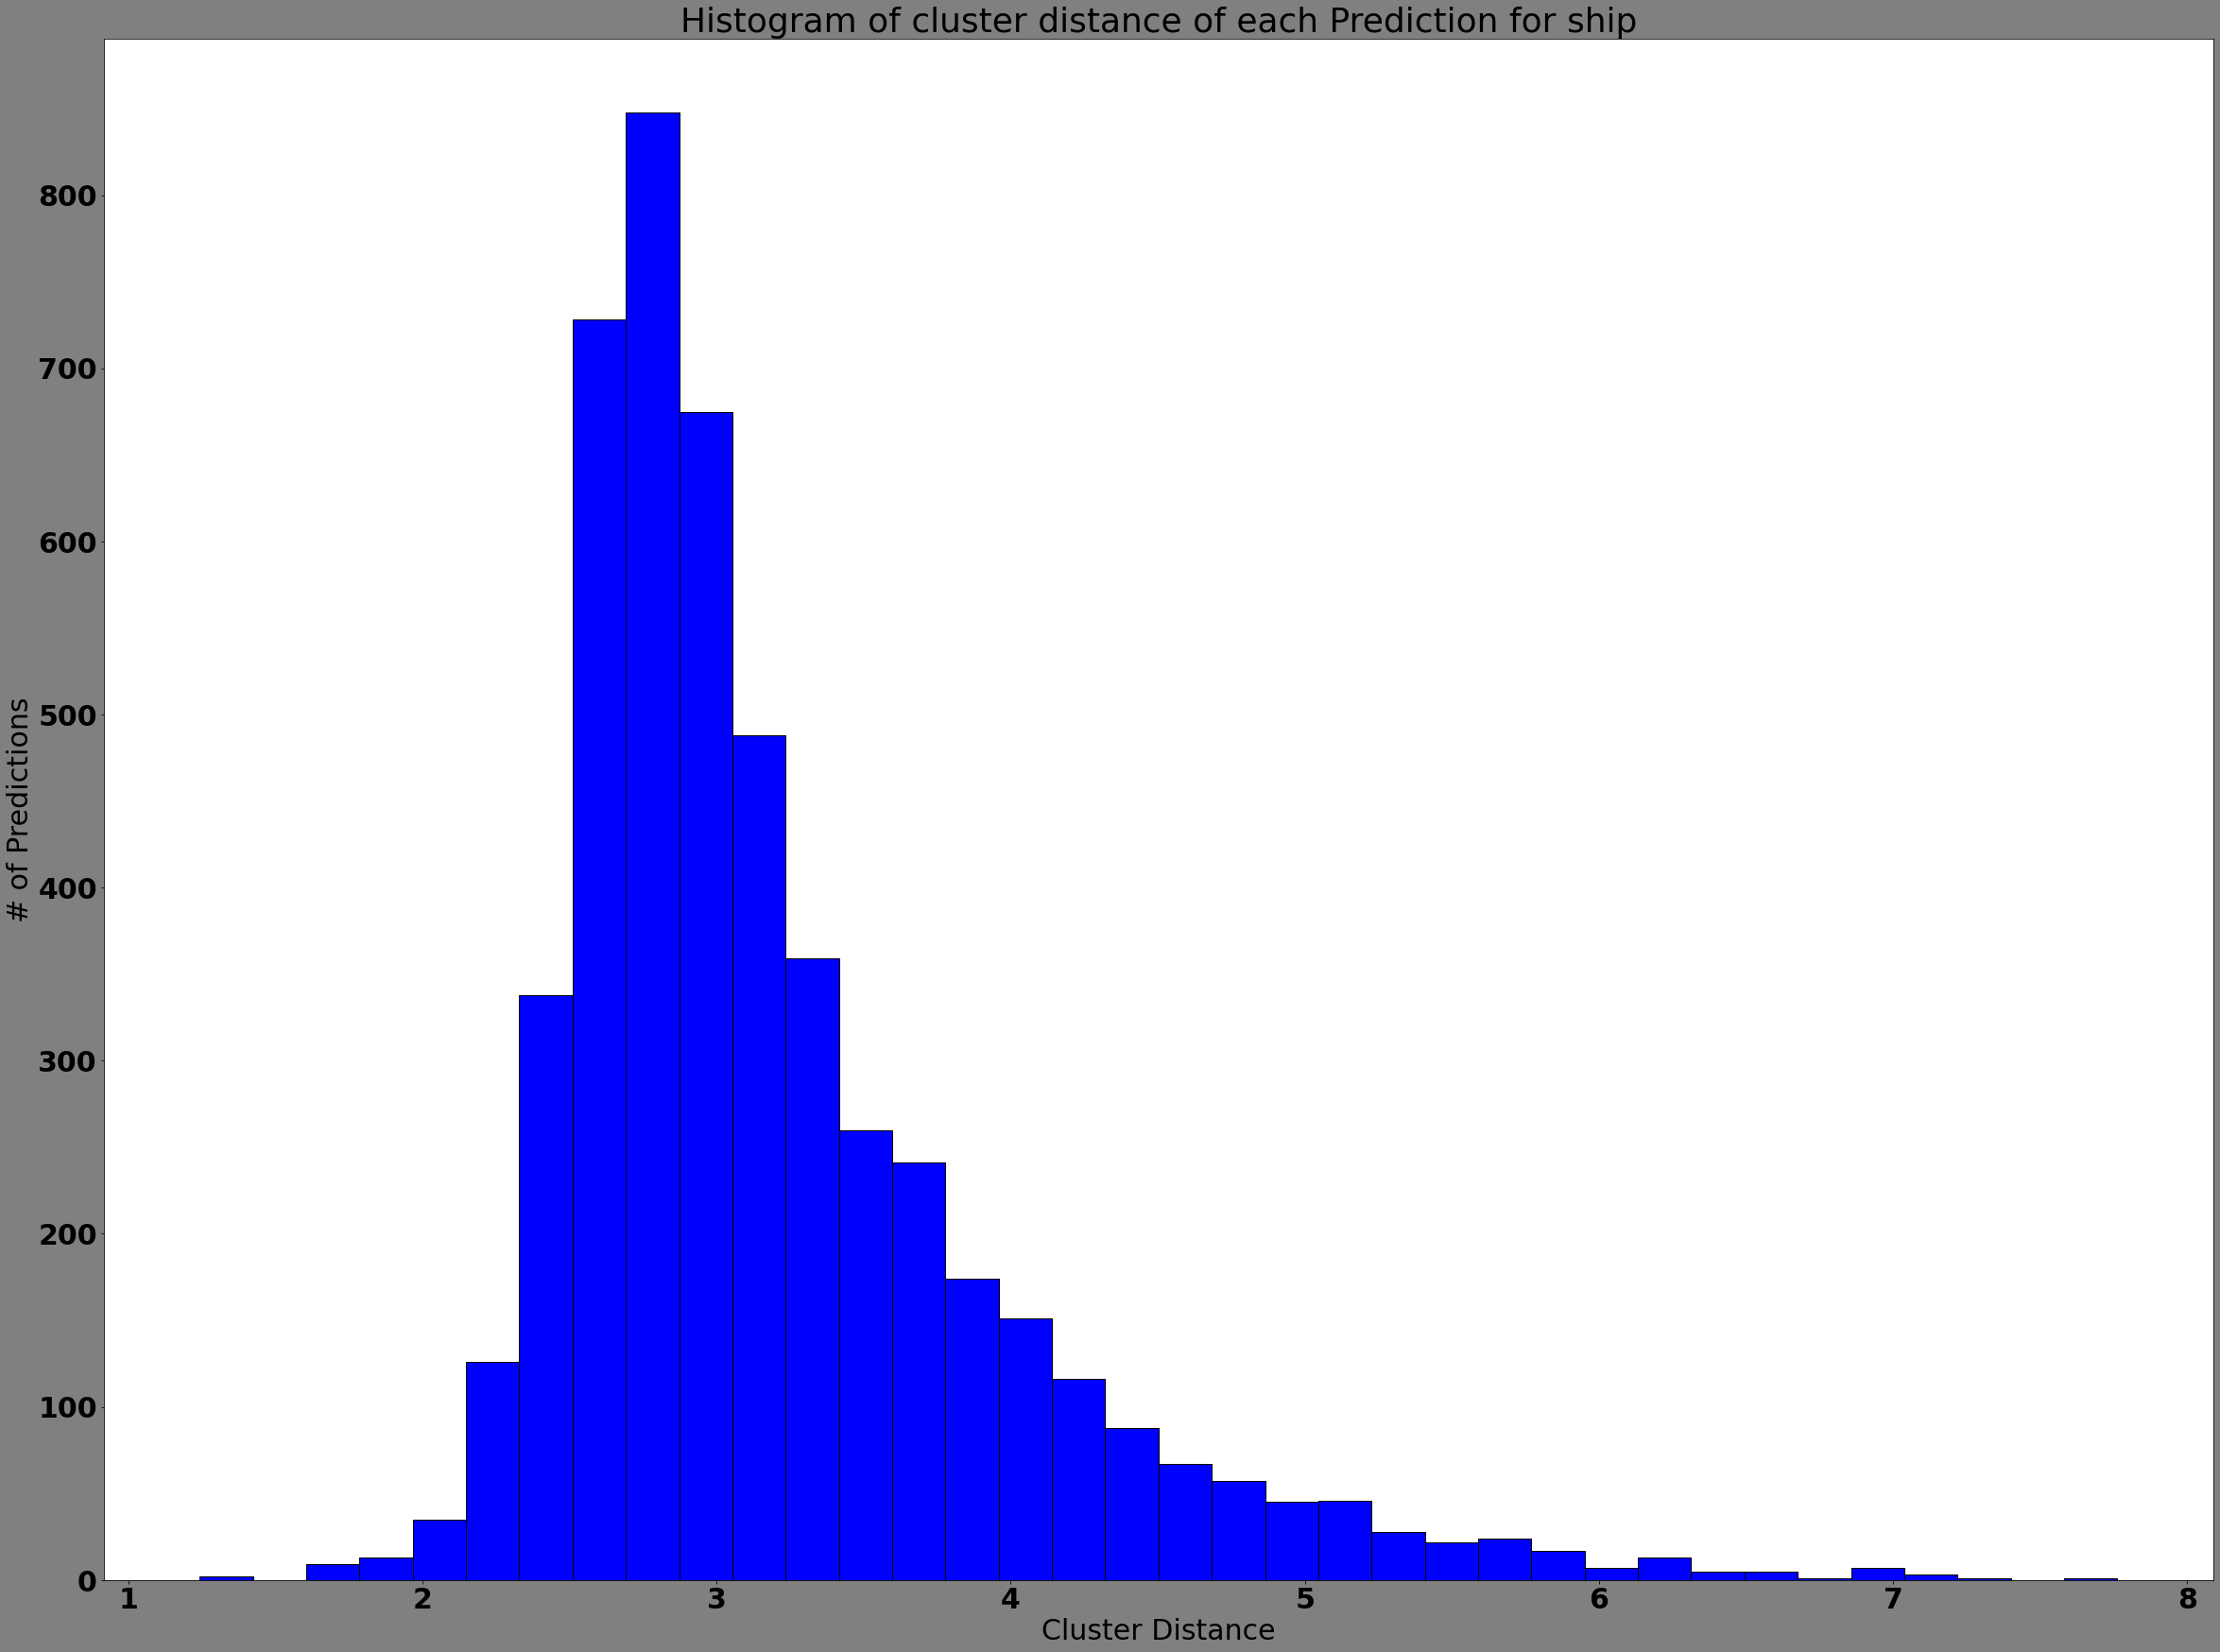

In [33]:
idx = 8
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 5.468144416809082
Variance: 2.555933952331543
Standard Deviation: 1.598728895187378


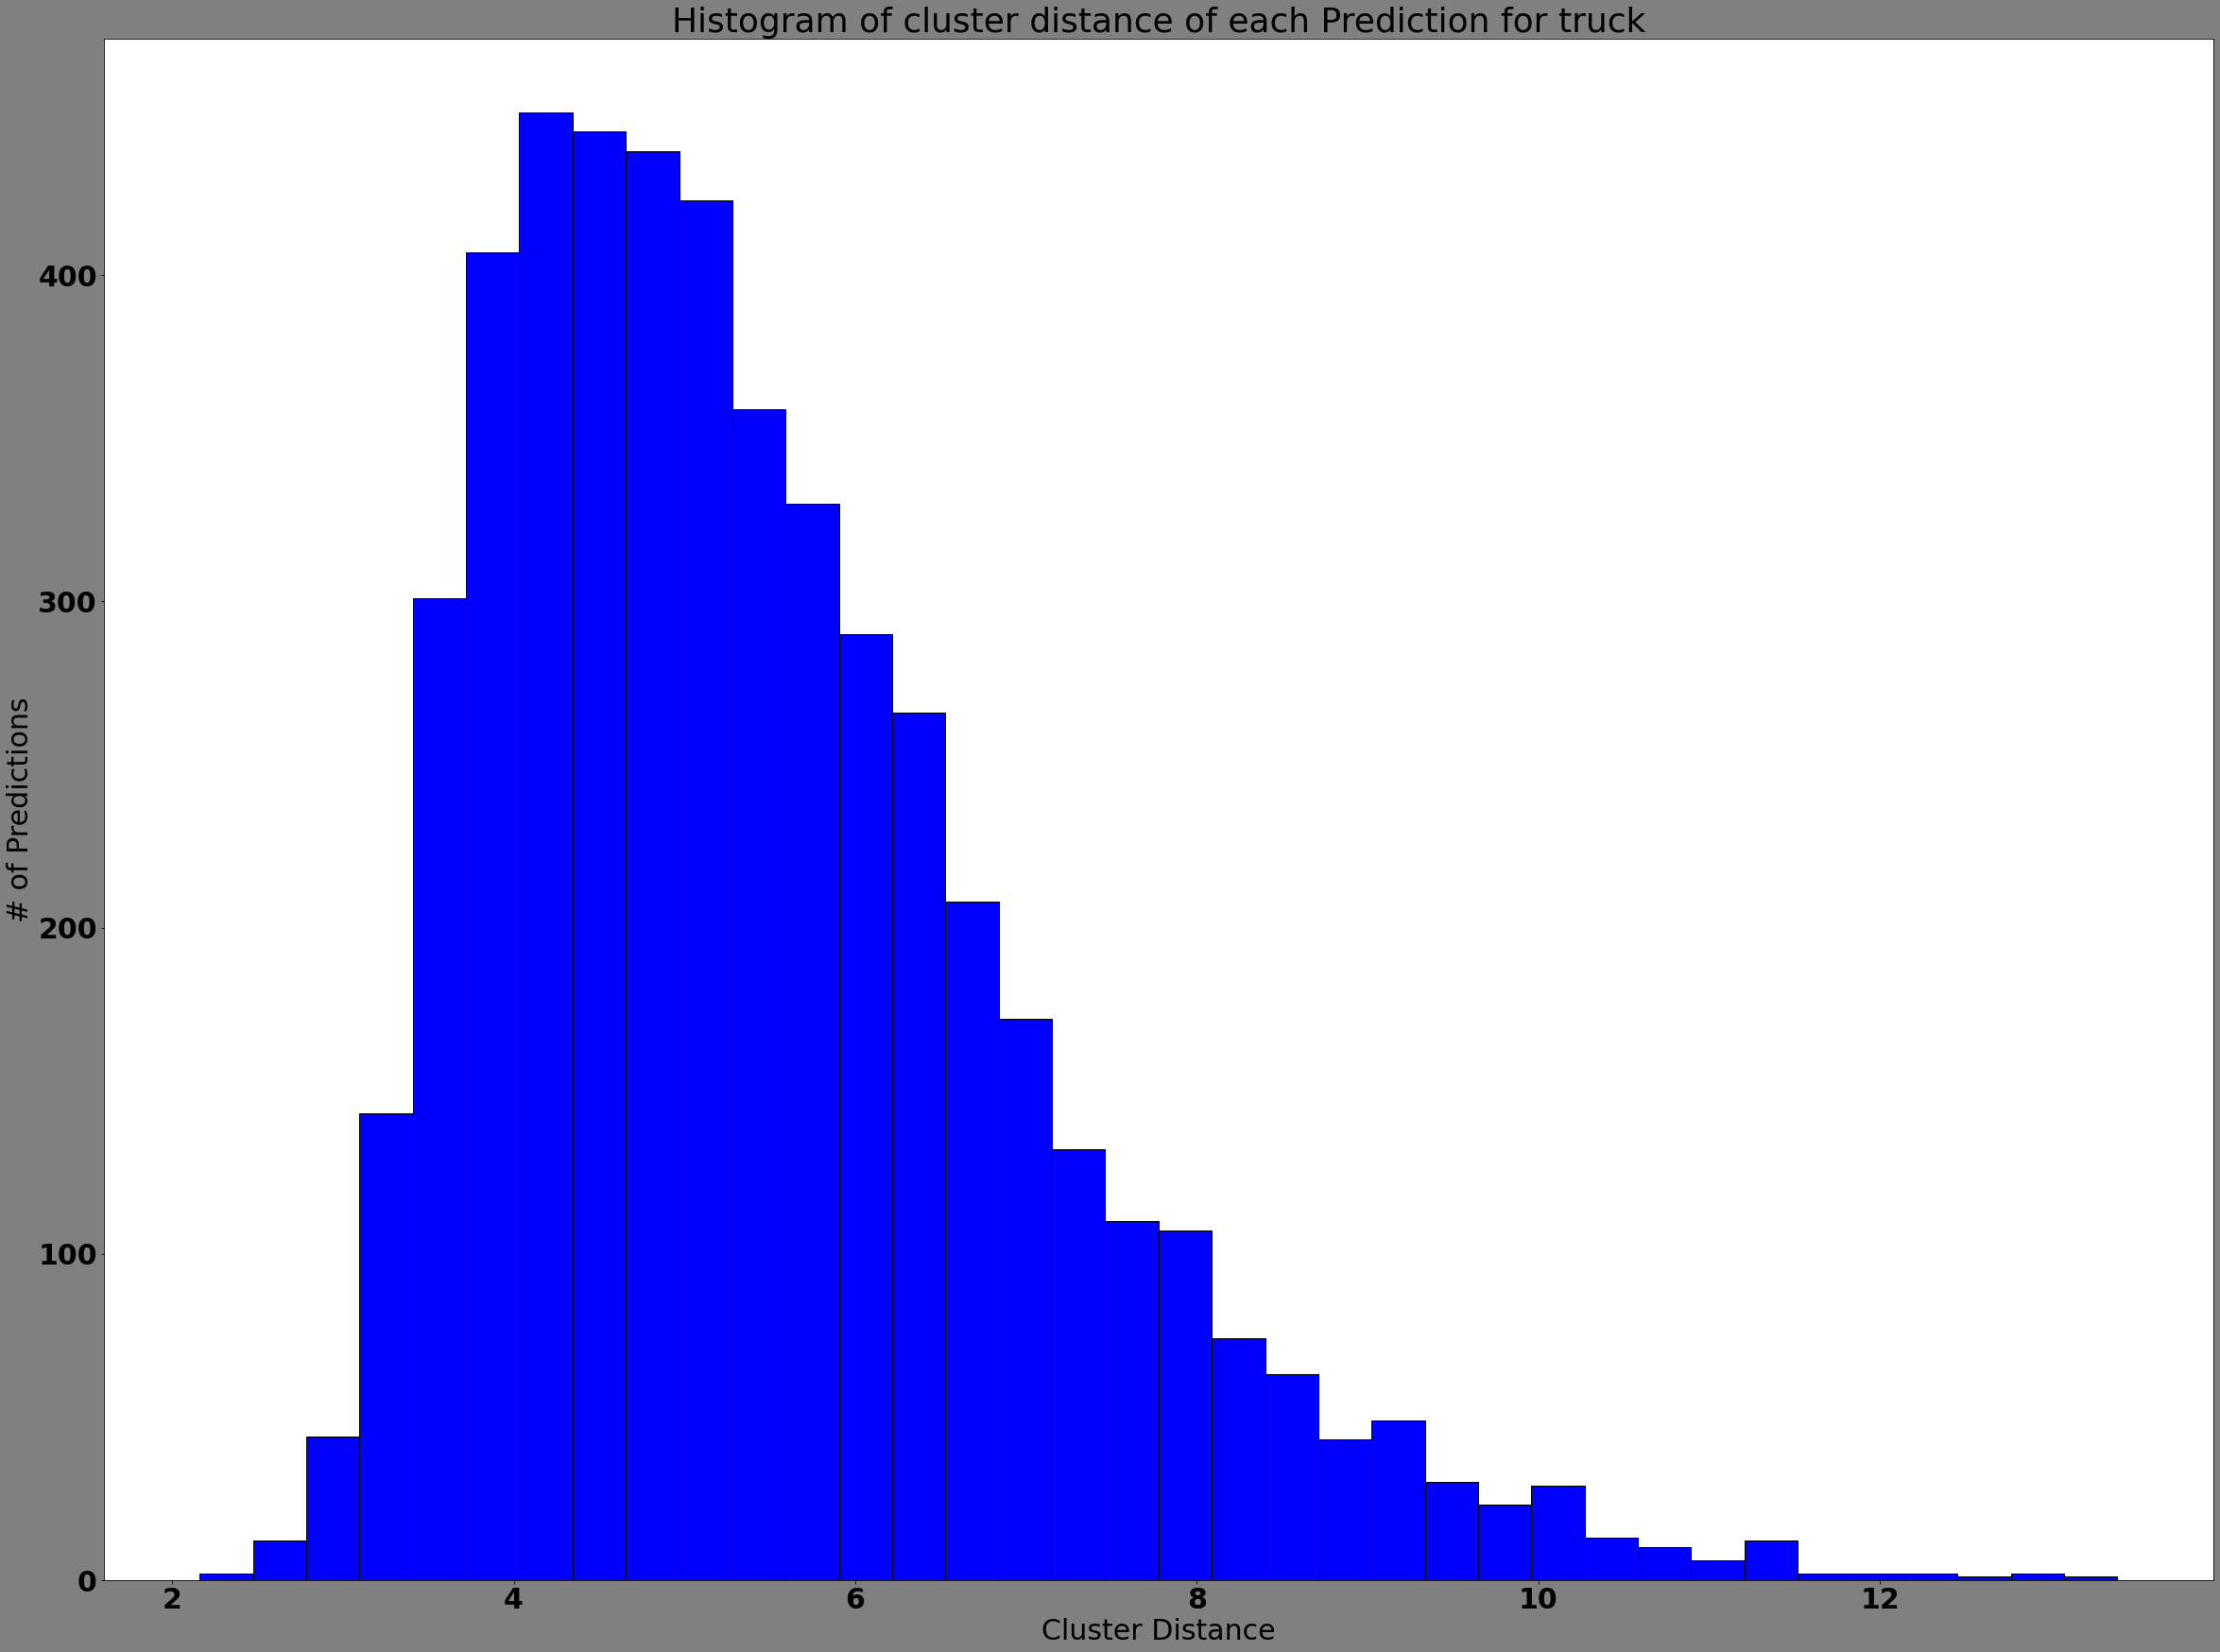

In [34]:
idx = 9
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

In [ ]:
img  = plt.imread('data/ISIC_2019_Training_Input/ISIC_0000000.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
extractor.predict(img.reshape(32,))

In [ ]:
img = cv2.resize(img, (32,32))

In [57]:
img.shape

(32, 32, 3)

In [59]:
np.expand_dims(img, axis = 0).shape

(1, 32, 32, 3)

In [61]:
sample = extractor.predict(np.expand_dims(img, axis = 0))

In [62]:
k.transform(sample)

array([[96.94706 , 96.447044, 94.690735, 97.2258  , 97.42157 , 96.48339 ,
        95.21491 , 96.353546, 95.215546, 97.29066 ]], dtype=float32)

In [64]:
os.listdir('data/SkinDiseaseDataset')

['ISIC_2019_Test_Metadata.csv',
 'ISIC_2019_Training_GroundTruth.csv',
 'ISIC_2019_Training_Metadata.csv',
 'Read-Me.docx']

In [35]:
df1 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Test_Metadata.csv')
df2 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Training_GroundTruth.csv')
df3 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Training_Metadata.csv')

In [42]:
def plot_class_pdf(vals, idx):
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 30}
    matplotlib.rc('font', **font)
    print("Mean: {}".format(stat.mean(vals)))
    print("Variance: {}".format(np.var(vals)))
    print("Standard Deviation: {}".format(np.std(vals)))
    plt.figure( figsize = (40, 30), facecolor = 'gray')
    plt.hist(vals, color = 'blue', edgecolor = 'black',
             bins = int(180))
    # Add labels
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
    plt.title('Histogram of cluster distance of each Prediction for {}'.format(classes[idx]))
    plt.xlabel('Cluster Distance')
    plt.ylabel('# of Predictions')
    #plt.set_facecolor('gray')
    plt.show()

In [37]:
l = []
for i in tqdm(range(5000)):
    skin_dis_images =  list(df2.image)
    tmp_img = plt.imread('data/ISIC_2019_Training_Input/{}.jpg'.format(skin_dis_images[i]))
    #print("Skin disease Dataset")
    plt.imshow(tmp_img)
    tmp = cv2.resize(tmp_img, (32,32))
    tmp = np.expand_dims(tmp, axis = 0)
    skin_disease_feature = extractor.predict(tmp, verbose = 0)
    cluster_distances = k.transform(skin_disease_feature)
    l.append(np.amin(cluster_distances))
    

 10%|███████▏                                                                   | 4810/50000 [07:40<1:12:05, 10.45it/s]


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021D79A3FF78> (for post_execute):


KeyboardInterrupt: 

Mean: 90.69513702392578
Variance: 2059.94873046875
Standard Deviation: 45.38665771484375


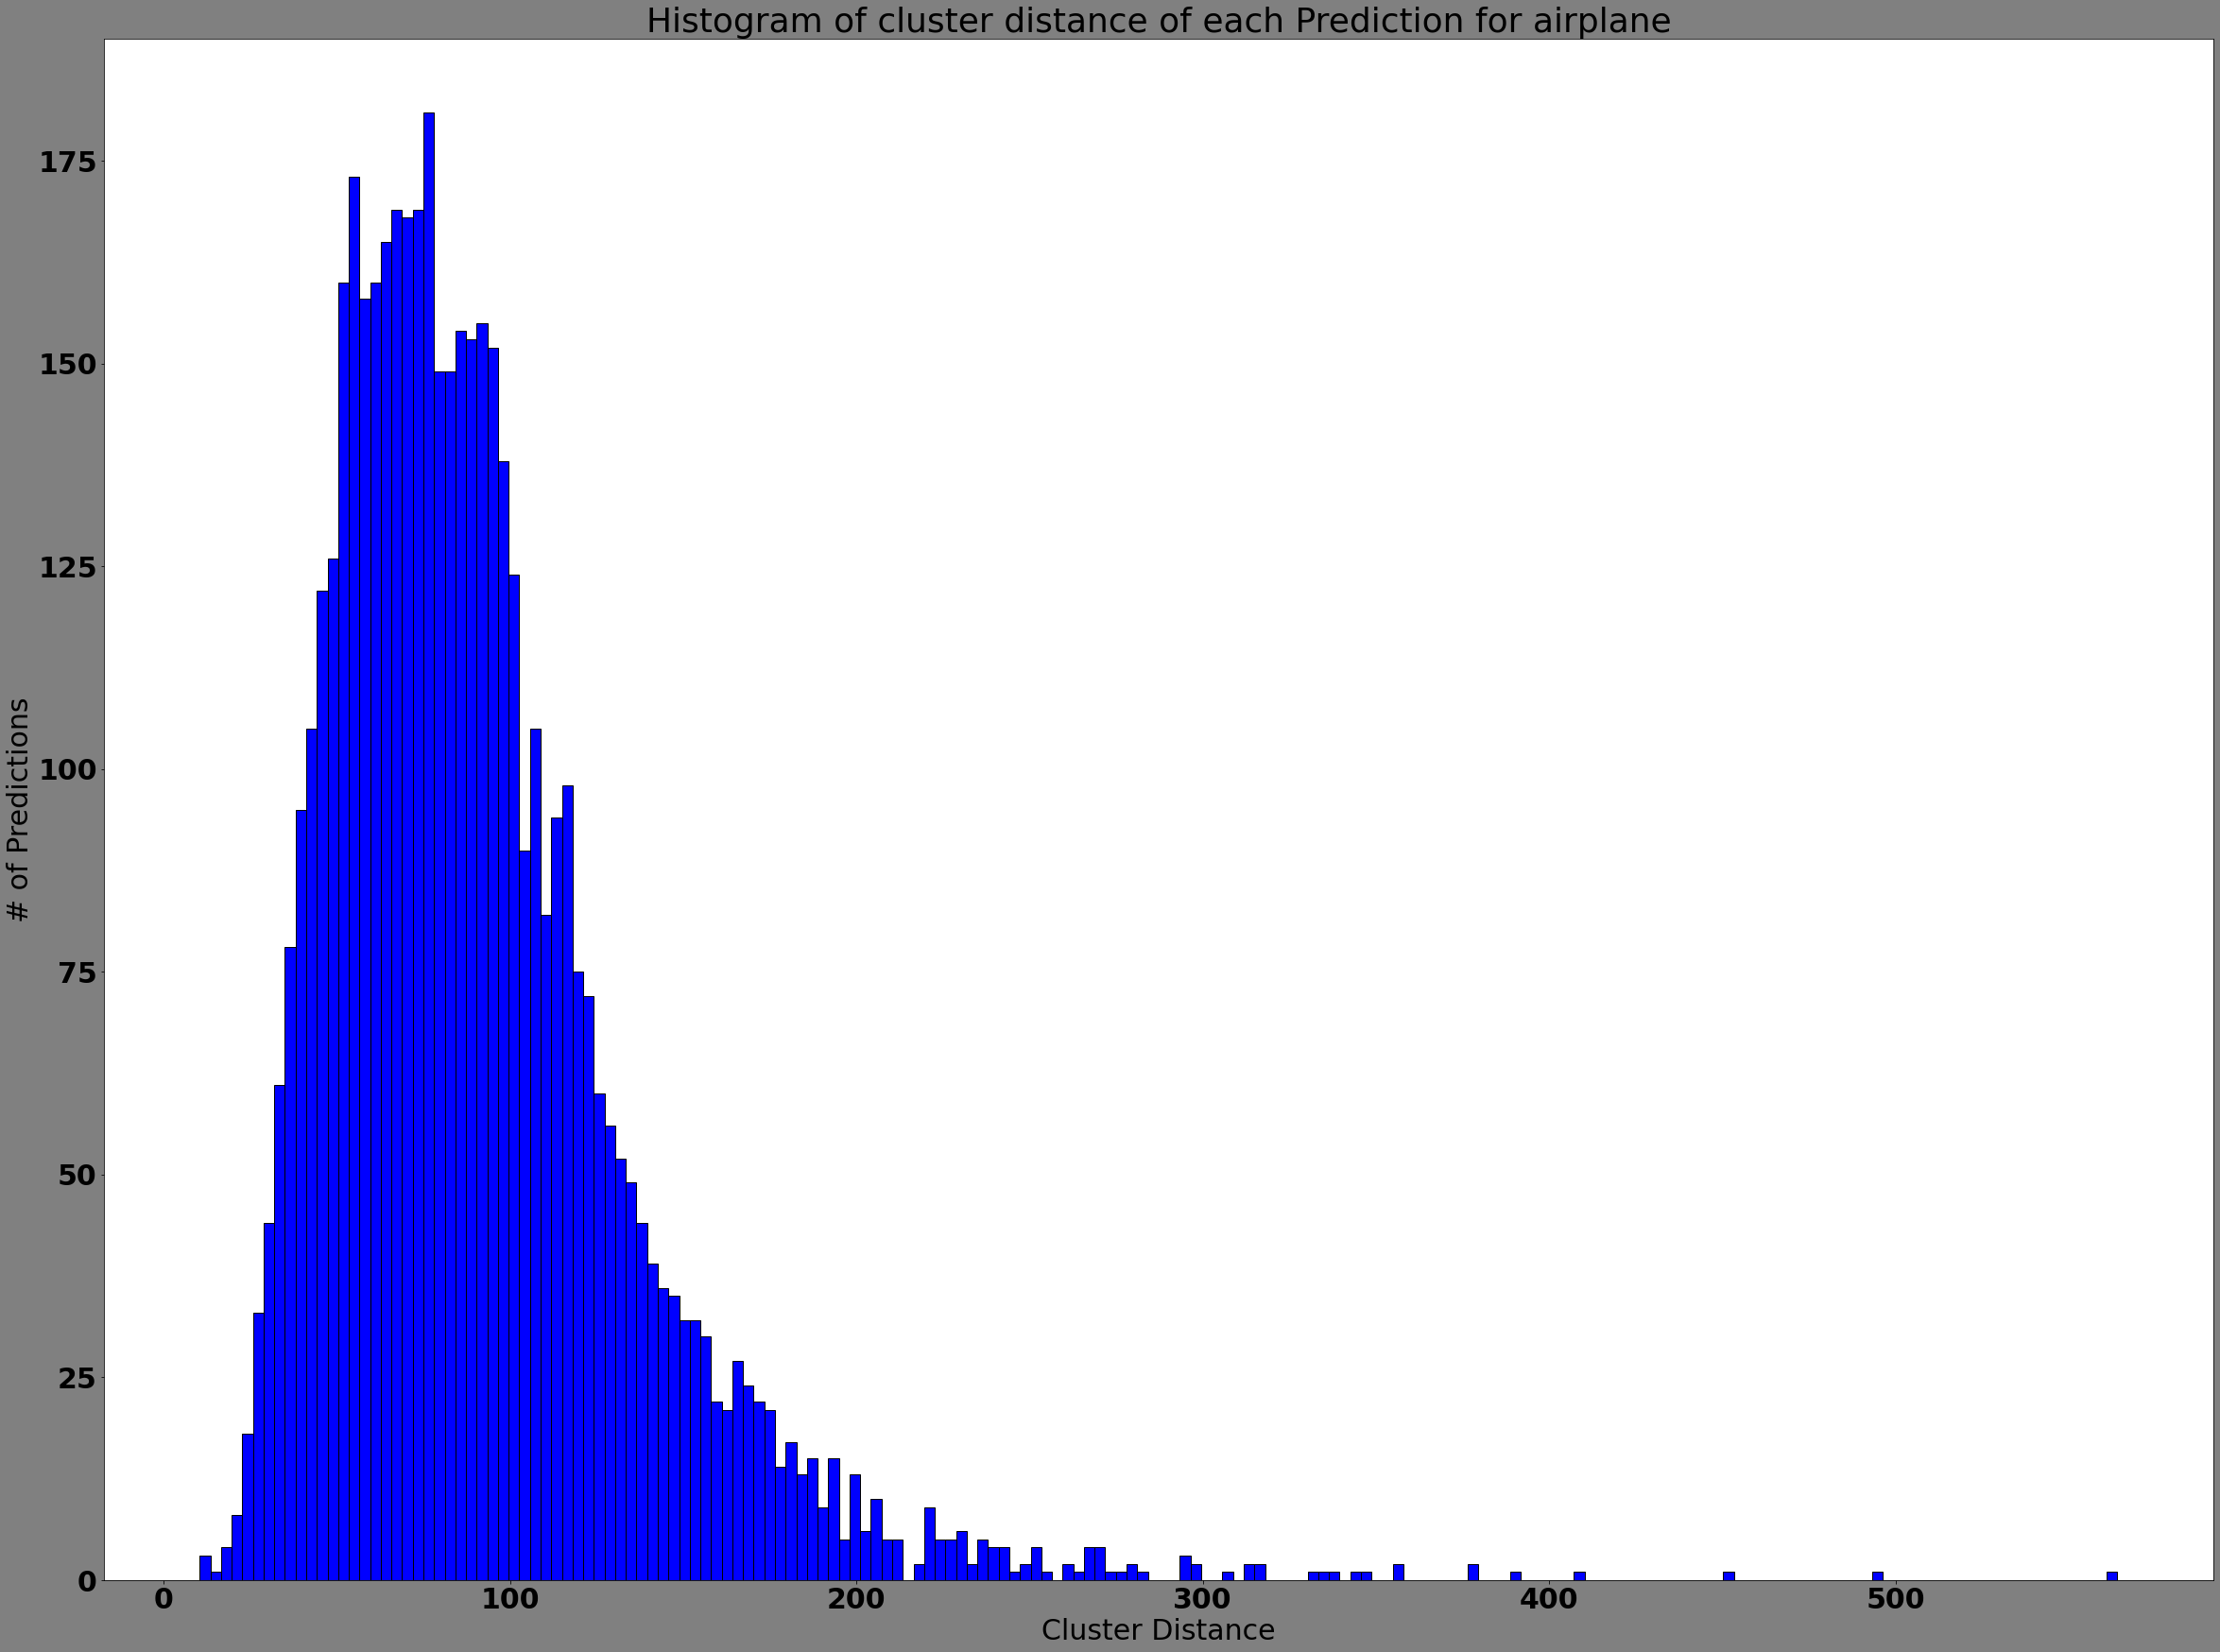

In [43]:
plot_class_pdf(l , 0)